---

#### **Introduction**

---

Research for the statistical analysis of meteorological data and machine learning methods for determining solar irradiation.

Researcher: Matheus Henrique da Silva.
Control and Automation Engineering Student.
Universidade Tecnológica Federal do Paraná, Cornélio Procópio, Paraná, Brasil. 
E-mail: matheussilva.2019@alunos.utfpr.edu.br. 
ID Lattes: 5450995625966991.

Supervisor: Wesley Angelino de Souza.
Lecturer in the Graduate Program in Electrical Engineering.
Universidade Tecnológica Federal do Paraná, Cornélio Procópio, Paraná, Brasil. 
E-mail: wesleyangelino@utfpr.edu.br. 
ID Lattes: 8594457321079718.


Steps of these code file

- Step 0 - Importing Libraries;
- Step 1 - data extraction and agglutination;
- Step 2 - statistical and exploratory analysis;
- Step 3 - data normalization and division;
- Step 4 - Machine Learning models training;
- Step 5 - Variables selection to optimize the ML models;
- Step 6 - Optimization of parameters of ML models;
- Step 7 - Cross validation of ML models optmize;
- Step 8 - Application of models.

---

#### **Step 0 - Importing Libraries**

---

In [1]:
# Manipulation data
import numpy as np
import pandas as pd
import csv
import glob
import datetime

# Grapichs
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Machine Learning
import sklearn

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.inspection import permutation_importance

from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import GridSearchCV

import joblib

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# For warnings
pd.options.mode.chained_assignment = None  
import warnings
warnings.filterwarnings("ignore")

---

#### **Step 1 - data extraction and agglutination**

---

Data collected and made available by the Instituto Nacional de Meteorologia (INMET), acess on https://portal.inmet.gov.br/, in format .csv of 606 meteorological collection stations of Brazil between 2010 and 2021.

Each .csv file contains 9 lines with information about the station: Nome; Codigo Estacao; Latitude; Longitude; Altitude; Situacao; Data Inicial; Data Final e Periodicidade da Medicao.

In line 11, contains the name of the variables: Data Medicao; Hora Medicao; PRECIPITACAO TOTAL, HORARIO(mm); PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA(mB); PRESSAO ATMOSFERICA REDUZIDA NIVEL DO MAR, AUT(mB); PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT)(mB); PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT)(mB); RADIACAO GLOBAL(Kj/mÂ²); TEMPERATURA DA CPU DA ESTACAO(Â°C); TEMPERATURA DO AR - BULBO SECO, HORARIA(Â°C); TEMPERATURA DO PONTO DE ORVALHO(Â°C); TEMPERATURA MAXIMA NA HORA ANT. (AUT)(Â°C); TEMPERATURA MINIMA NA HORA ANT. (AUT)(Â°C); TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT)(Â°C); TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT)(Â°C); TENSAO DA BATERIA DA ESTACAO(V); UMIDADE REL. MAX. NA HORA ANT. (AUT)(%); UMIDADE REL. MIN. NA HORA ANT. (AUT)(%); UMIDADE RELATIVA DO AR, HORARIA(%); VENTO, DIRECAO HORARIA (gr)(Â° (gr)); VENTO, RAJADA MAXIMA(m/s); VENTO, VELOCIDADE HORARIA(m/s).

From line 12, the data collected.


In [8]:
# Dataframe with the informations of all stations

df_stations = pd.DataFrame(columns =  ["csv", "nome", "codigo", "latitude", 
                                       "longitude", "altitude", "situacao", "data_inicio", 
                                       "data_fim", "periodicidade"])

for file in glob.glob("all_data/*.csv"):
        
    arquivo = file
    file = open(file)

    csv_reader = csv.reader(file)

    # 1: 'nome': nome_estacao
    row = next(csv_reader)
    row=str(row[0])
    tmp=row.split(": ")
    nome_estacao = tmp[1]
    
    # 2: 'codigo': codigo_estacao
    row = next(csv_reader)
    row=str(row[0])
    tmp=row.split(": ")
    codigo_estacao = tmp[1]
    
    # 3: 'latitude': latitude_estacao
    row = next(csv_reader)
    row=str(row[0])
    tmp=row.split(": ")
    latitude_estacao = tmp[1]
    
    # 4: 'longitude': longitude_estacao
    row = next(csv_reader)
    row=str(row[0])
    tmp=row.split(": ")
    longitude_estacao = tmp[1]
    
    # 5: 'altitude': altitude_estacao
    row = next(csv_reader)
    row=str(row[0])
    tmp=row.split(": ")
    altitude_estacao = tmp[1]
    
    # 5: 'situacao': situacao_estacao
    row = next(csv_reader)
    row=str(row[0])
    tmp=row.split(": ")
    situacao_estacao = tmp[1]
    
    # 6: 'data_inicio': data_inicio_coleta_estacao
    row = next(csv_reader)
    row=str(row[0])
    tmp=row.split(": ")
    data_inicio_coleta_estacao = tmp[1]
    
    # 7: 'data_fim': data_fim_coleta_estacao
    row = next(csv_reader)
    row=str(row[0])
    tmp=row.split(": ")
    data_fim_coleta_estacao = tmp[1]

    # 8: 'periodicidade': peridiocidade_dados_estacao
    row = next(csv_reader)
    row=str(row[0])
    tmp=row.split(": ")
    peridiocidade_dados_estacao = tmp[1]
    
    new_row = {'csv': str(arquivo), 
               'nome': nome_estacao, 
               'codigo': codigo_estacao, 
               'latitude': latitude_estacao,
               'longitude': longitude_estacao,
               'altitude': altitude_estacao,
               'situacao': situacao_estacao, 
               'data_inicio': data_inicio_coleta_estacao, 
               'data_fim': data_fim_coleta_estacao, 
               'periodicidade': peridiocidade_dados_estacao}
    
    df_stations = df_stations.append(new_row, ignore_index=True)

In [9]:
df_stations.head()

,csv,nome,codigo,latitude,longitude,altitude,situacao,data_inicio,data_fim,periodicidade
0,E:/Projetos/IC_DADOS/dados_meteorologicos_copy...,BRASILIA,A001,-15.789343,-47.925756,1160.96,Operante,2010-01-01,2021-02-01,Horaria
1,E:/Projetos/IC_DADOS/dados_meteorologicos_copy...,GOIANIA,A002,-16.642841,-49.220222,727.3,Operante,2010-01-01,2021-02-01,Horaria
2,E:/Projetos/IC_DADOS/dados_meteorologicos_copy...,MORRINHOS,A003,-17.745066,-49.101698,751.09,Operante,2010-01-01,2021-02-01,Horaria
3,E:/Projetos/IC_DADOS/dados_meteorologicos_copy...,NIQUELANDIA,A004,-14.469358,-48.485756,663.53,Fechada,2010-01-01,2018-06-20,Horaria
4,E:/Projetos/IC_DADOS/dados_meteorologicos_copy...,PORANGATU,A005,-13.30944444,-49.11749999,365,Operante,2010-01-01,2021-02-01,Horaria


In [10]:
# Identification of data types and changes for station selection

data_types = df_stations.dtypes

print(data_types)

df_stations['latitude'] = df_stations['latitude'].astype(float)
df_stations['longitude'] = df_stations['longitude'].astype(float)

csv              object
nome             object
codigo           object
latitude         object
longitude        object
altitude         object
situacao         object
data_inicio      object
data_fim         object
periodicidade    object
dtype: object


In [11]:
# Selection of the stations in Cornélio Procópio-PR region

lat = -23.185038698153438
lon = -50.647548006591066
dist = 4

lim_lat_higher = lat + dist 
lim_lat_bottom = lat - dist

lon =  -50.647548006591066
lim_lon_right = lon + dist
lim_lon_left = lon - dist

selected_stations = df_stations[((df_stations['latitude'] >= lim_lat_bottom) & (df_stations['latitude'] <= lim_lat_higher)) & \
                            ((df_stations['longitude'] >= lim_lon_left) & (df_stations['longitude'] <= lim_lon_right))]

In [12]:
selected_stations.head()

,csv,nome,codigo,latitude,longitude,altitude,situacao,data_inicio,data_fim,periodicidade
270,E:/Projetos/IC_DADOS/dados_meteorologicos_copy...,ARAXA,A505,-19.605696,-46.949617,1018.32,Operante,2010-01-01,2021-02-01,Horaria
284,E:/Projetos/IC_DADOS/dados_meteorologicos_copy...,CAMPINA VERDE,A519,-19.539210,-49.518133,559.07,Operante,2010-01-01,2021-02-01,Horaria
285,E:/Projetos/IC_DADOS/dados_meteorologicos_copy...,CONCEICAO DAS ALAGOAS,A520,-19.985860,-48.151574,572.54,Operante,2010-01-01,2021-02-01,Horaria
290,E:/Projetos/IC_DADOS/dados_meteorologicos_copy...,SACRAMENTO,A525,-19.875278,-47.434167,913.12,Operante,2010-01-01,2021-02-01,Horaria
325,E:/Projetos/IC_DADOS/dados_meteorologicos_copy...,SAO SEBASTIAO DO PARAISO,A561,-20.909892,-47.114259,845,Operante,2015-08-16,2021-02-01,Horaria


In [13]:
# Dynamic map for station location

map = folium.Map(location=[lat, lon], zoom_start=14)

folium.Marker(location=[lat, lon], popup='CORNÉLIO PROCÓPIO').add_to(map)

lenght = selected_stations.shape[0]

lat_ar = np.zeros(lenght)
lon_ar = np.zeros(lenght)
est_ar = np.empty((lenght), dtype=object)

index = selected_stations.index.to_numpy()

for i in range(lenght):

    lat_ar[i] = selected_stations.loc[index[i], 'latitude']
    lon_ar[i] = selected_stations.loc[index[i], 'longitude']
    est_ar[i] = selected_stations.loc[index[i], 'nome']

    popup_station = folium.Popup(f'{est_ar[i]}\n{lat_ar[i]},{lon_ar[i]}')
    folium.Marker(location=[lat_ar[i], lon_ar[i]], popup=popup_station).add_to(map)

map

In [14]:
# Dataframe with the data agglutination

data_loaded = 1

if(data_loaded==0):
    
    result = pd.DataFrame()

    for file in selected_stations['csv']:

        df_temp = pd.read_csv(file, skiprows=10, delimiter=";", decimal=",")
        df_temp.drop(df_temp.columns[[4,5,6,8,11,12,13,14,15,16,17,22]],axis=1, inplace = True)
        df_temp.dropna(inplace=True)

        result = pd.concat([result, df_temp])
        
    result.to_csv('data_agglutinated/data_selected_stations.csv') 
    
else:
    result = pd.read_csv('data_agglutinated/data_selected_stations.csv', delimiter=",")

FileNotFoundError: [Errno 2] No such file or directory: 'data_agglutinated/data_selected_stations.csv'

In [15]:
result.head()

NameError: name 'result' is not defined

---

#### **Step 2 - statistical and exploratory analysis**

---



##### Step 2.1 - load and transformation


In [16]:
# Load data

# data = pd.read_csv('data_agglutinated/data_selected_stations.csv')

# data = pd.read_csv('E:/Projetos/IC_DADOS/dados_meteorologicos_copy/todos_dados/data_selected.csv')

In [17]:
# Change variables name and format of date

data.drop(data.columns[0],axis=1, inplace = True)
data.rename(columns = {'Data Medicao': 'data'}, inplace = True)
data['data'] = pd.to_datetime(data['data'])
data.rename(columns = {'Hora Medicao': 'hora'}, inplace = True)
data.rename(columns = {'PRECIPITACAO TOTAL, HORARIO(mm)': 'precipitacao'}, inplace = True)
data.rename(columns = {'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA(mB)': 'pressao_atm'}, inplace = True)
data.rename(columns = {'RADIACAO GLOBAL(Kj/m²)': 'radiacao'}, inplace = True)
data.rename(columns = {'TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)': 'temperatura'}, inplace = True)
data.rename(columns = {'TEMPERATURA DO PONTO DE ORVALHO(°C)': 'temp_orvalho'}, inplace = True)
data.rename(columns = {'UMIDADE RELATIVA DO AR, HORARIA(%)': 'umidade'}, inplace = True)
data.rename(columns = {'VENTO, DIRECAO HORARIA (gr)(° (gr))': 'direcao_vento'}, inplace = True)
data.rename(columns = {'VENTO, RAJADA MAXIMA(m/s)': 'vento_maximo'}, inplace = True)
data.rename(columns = {'VENTO, VELOCIDADE HORARIA(m/s)': 'velocidade'}, inplace = True)

FileNotFoundError: [Errno 2] No such file or directory: 'figures/scatter_radiacao_hora.png'

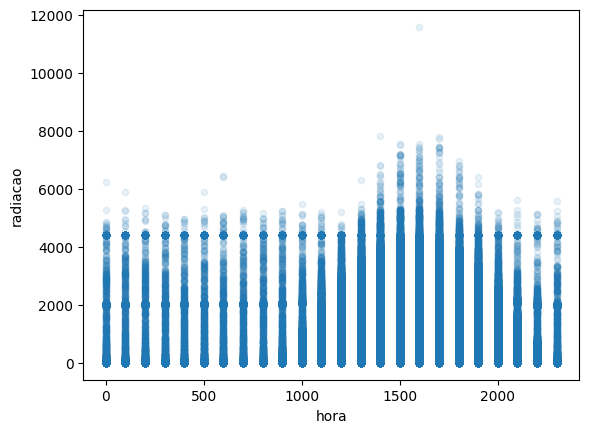

In [18]:
# Scatter plot of target variable 'radiacao' by 'hora'

ax = data.plot(kind="scatter", x="hora", y="radiacao", alpha=0.1)
ax.tick_params(axis='both', which='both', labelsize=14)
ax.set_xlabel("hora", fontsize=14)
ax.set_ylabel("irradiacao", fontsize=14) 

plt.savefig('figures/scatter_radiacao_hora.png', format='png', dpi = 500)

In the preliminary analyses, we noticed that the data are concentrated between 10 am and 10 pm

However, solar radiation begins to be noticed along with sunrise ~ 6:40 am

Therefore, we will shift the data by -3 hours each (due to the Brazilian time zone)

In [19]:
def adjust_hour(df):

    df['hora'] = df['hora'].replace(0, 21)
    df['hora'] = df['hora'].replace(100, 22)
    df['hora'] = df['hora'].replace(200, 23)
    df['hora'] = df['hora'].replace(300, 0)
    df['hora'] = df['hora'].replace(400, 1)
    df['hora'] = df['hora'].replace(500, 2)
    df['hora'] = df['hora'].replace(600, 3)
    df['hora'] = df['hora'].replace(700, 4)
    df['hora'] = df['hora'].replace(800, 5)
    df['hora'] = df['hora'].replace(900, 6)
    df['hora'] = df['hora'].replace(1000, 7)
    df['hora'] = df['hora'].replace(1100, 8)
    df['hora'] = df['hora'].replace(1200, 9)
    df['hora'] = df['hora'].replace(1300, 10)
    df['hora'] = df['hora'].replace(1400, 11)
    df['hora'] = df['hora'].replace(1500, 12)
    df['hora'] = df['hora'].replace(1600, 13)
    df['hora'] = df['hora'].replace(1700, 14)
    df['hora'] = df['hora'].replace(1800, 15)
    df['hora'] = df['hora'].replace(1900, 16)
    df['hora'] = df['hora'].replace(2000, 17)
    df['hora'] = df['hora'].replace(2100, 18)
    df['hora'] = df['hora'].replace(2200, 19)
    df['hora'] = df['hora'].replace(2300, 20)

    return df

In [20]:
data = adjust_hour(data)

In [21]:
# data dataframe info, quantities and types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6470986 entries, 0 to 6470985
Data columns (total 11 columns):
 #   Column         Dtype         
---  ------         -----         
 0   data           datetime64[ns]
 1   hora           int64         
 2   precipitacao   float64       
 3   pressao_atm    float64       
 4   radiacao       float64       
 5   temperatura    float64       
 6   temp_orvalho   float64       
 7   umidade        float64       
 8   direcao_vento  float64       
 9   vento_maximo   float64       
 10  velocidade     float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 543.1 MB


In [22]:
# Checking for NULL values

non_null_counts = data.count()

print(non_null_counts)

data             6470986
hora             6470986
precipitacao     6470986
pressao_atm      6470986
radiacao         6470986
temperatura      6470986
temp_orvalho     6470986
umidade          6470986
direcao_vento    6470986
vento_maximo     6470986
velocidade       6470986
dtype: int64


In [23]:
# Statistical describe

data.describe()

,hora,precipitacao,pressao_atm,radiacao,temperatura,temp_orvalho,umidade,direcao_vento,vento_maximo,velocidade
count,6.470986e+06,6.470986e+06,6.470986e+06,6.470986e+06,6.470986e+06,6.470986e+06,6.470986e+06,6.470986e+06,6.470986e+06,6.470986e+06
mean,1.156901e+01,1.666962e-01,9.492351e+02,7.320718e+02,2.135529e+01,1.544690e+01,7.276034e+01,1.621449e+02,4.799377e+00,1.916122e+00
std,6.890057e+00,1.257429e+00,2.916017e+01,1.057131e+03,5.681798e+00,4.630613e+00,2.014357e+01,1.012463e+02,2.981291e+00,1.630865e+00
min,0.000000e+00,0.000000e+00,8.677000e+02,-1.320000e+01,-6.900000e+00,-1.000000e+01,7.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+00,0.000000e+00,9.280000e+02,-3.473000e+00,1.770000e+01,1.240000e+01,5.900000e+01,7.800000e+01,2.700000e+00,6.000000e-01
50%,1.200000e+01,0.000000e+00,9.500000e+02,3.029450e+01,2.130000e+01,1.610000e+01,7.700000e+01,1.430000e+02,4.500000e+00,1.700000e+00
75%,1.800000e+01,0.000000e+00,9.681000e+02,1.328827e+03,2.510000e+01,1.900000e+01,9.000000e+01,2.400000e+02,6.600000e+00,2.900000e+00
max,2.300000e+01,9.600000e+01,1.033800e+03,1.158649e+04,4.440000e+01,3.810000e+01,1.000000e+02,3.600000e+02,4.030000e+01,1.930000e+01


##### Step 2.2 - data cleaning

Previously, there were discrepant values ​​noticed at unconventional times, for this reason they caused the outliers to be cleaned in a different way:

We take the data per hour, and remove according to the variable_target 'radiacao' the last 3.5 * standard deviation


In [24]:
def remove_out(df):

    dados_0 = df[df['hora'] == 0]
    dados_1 = df[df['hora'] == 1]
    dados_2 = df[df['hora'] == 2]
    dados_3 = df[df['hora'] == 3]
    dados_4 = df[df['hora'] == 4]
    dados_5 = df[df['hora'] == 5]
    dados_6 = df[df['hora'] == 6]
    dados_7 = df[df['hora'] == 7]
    dados_8 = df[df['hora'] == 8]
    dados_9 = df[df['hora'] == 9]
    dados_10 = df[df['hora'] == 10]
    dados_11 = df[df['hora'] == 11]
    dados_12 = df[df['hora'] == 12]
    dados_13 = df[df['hora'] == 13]
    dados_14 = df[df['hora'] == 14]
    dados_15 = df[df['hora'] == 15]
    dados_16 = df[df['hora'] == 16]
    dados_17 = df[df['hora'] == 17]
    dados_18 = df[df['hora'] == 18]
    dados_19 = df[df['hora'] == 19]
    dados_20 = df[df['hora'] == 20]
    dados_21 = df[df['hora'] == 21]
    dados_22 = df[df['hora'] == 22]
    dados_23 = df[df['hora'] == 23]

    data_hour = [dados_0, dados_1, dados_2, dados_3, dados_4, dados_5, dados_6, dados_7, dados_8, dados_9, dados_10, dados_11, dados_12, dados_13, dados_14, dados_15, dados_16, dados_17, dados_18, dados_19, dados_20, dados_21, dados_22, dados_23]

    data_filtered = pd.DataFrame()

    for i in data_hour:

        mean_radiacao = np.mean(i['radiacao'])
        std_radiacao = np.std(i['radiacao'])

        lower = mean_radiacao - 3.5 * std_radiacao
        upper = mean_radiacao + 3.5 * std_radiacao

        y = i.query('radiacao <= @upper')

        data_filtered = pd.concat([data_filtered, y])

    return data_filtered

In [25]:
data = remove_out(data)

FileNotFoundError: [Errno 2] No such file or directory: 'figures/scatter_radiacao_hora_filtered.png'

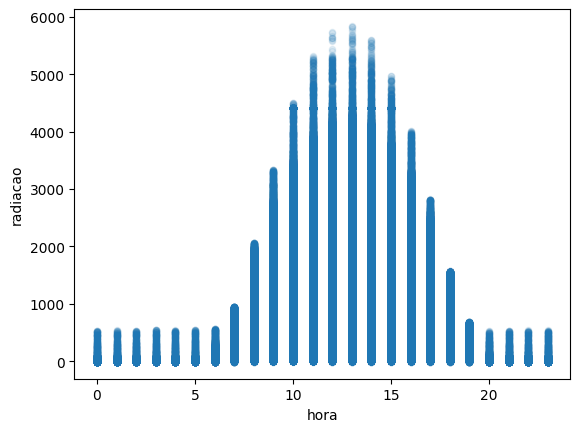

In [26]:
# Scatter plot of target variable 'radiacao' by 'hora' with filtered data

data.plot(kind="scatter", x="hora", y="radiacao", alpha=0.1)
ax.tick_params(axis='both', which='both', labelsize=14)
ax.set_xlabel("hora", fontsize=14)
ax.set_ylabel("irradiacao", fontsize=14) 

plt.savefig('figures/scatter_radiacao_hora_filtered.png', format='png', dpi = 500)

##### Step 2.3 - statistical analysis


In [27]:
# Statistical describe with filtered data

data.describe()

,hora,precipitacao,pressao_atm,radiacao,temperatura,temp_orvalho,umidade,direcao_vento,vento_maximo,velocidade
count,6.456111e+06,6.456111e+06,6.456111e+06,6.456111e+06,6.456111e+06,6.456111e+06,6.456111e+06,6.456111e+06,6.456111e+06,6.456111e+06
mean,1.157049e+01,1.665817e-01,9.492751e+02,7.278297e+02,2.135701e+01,1.544720e+01,7.275585e+01,1.621638e+02,4.800405e+00,1.916382e+00
std,6.887227e+00,1.256520e+00,2.914569e+01,1.052846e+03,5.683754e+00,4.631439e+00,2.014637e+01,1.012603e+02,2.981891e+00,1.631062e+00
min,0.000000e+00,0.000000e+00,8.677000e+02,-1.320000e+01,-6.900000e+00,-1.000000e+01,7.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+00,0.000000e+00,9.280000e+02,-3.475000e+00,1.770000e+01,1.240000e+01,5.900000e+01,7.800000e+01,2.700000e+00,6.000000e-01
50%,1.200000e+01,0.000000e+00,9.500000e+02,2.864600e+01,2.130000e+01,1.610000e+01,7.700000e+01,1.430000e+02,4.500000e+00,1.700000e+00
75%,1.800000e+01,0.000000e+00,9.681000e+02,1.318107e+03,2.510000e+01,1.900000e+01,9.000000e+01,2.400000e+02,6.600000e+00,2.900000e+00
max,2.300000e+01,9.600000e+01,1.033800e+03,5.842743e+03,4.440000e+01,3.810000e+01,1.000000e+02,3.600000e+02,4.030000e+01,1.930000e+01


In [28]:
# Histogram of the variables

def histogram_variables(df, filename=None):

    df.hist(bins=50, figsize=(20,15))

    if filename is not None:
        plt.savefig(filename, format='pdf', bbox_inches='tight')

    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'figures/histogram_variables.pdf'

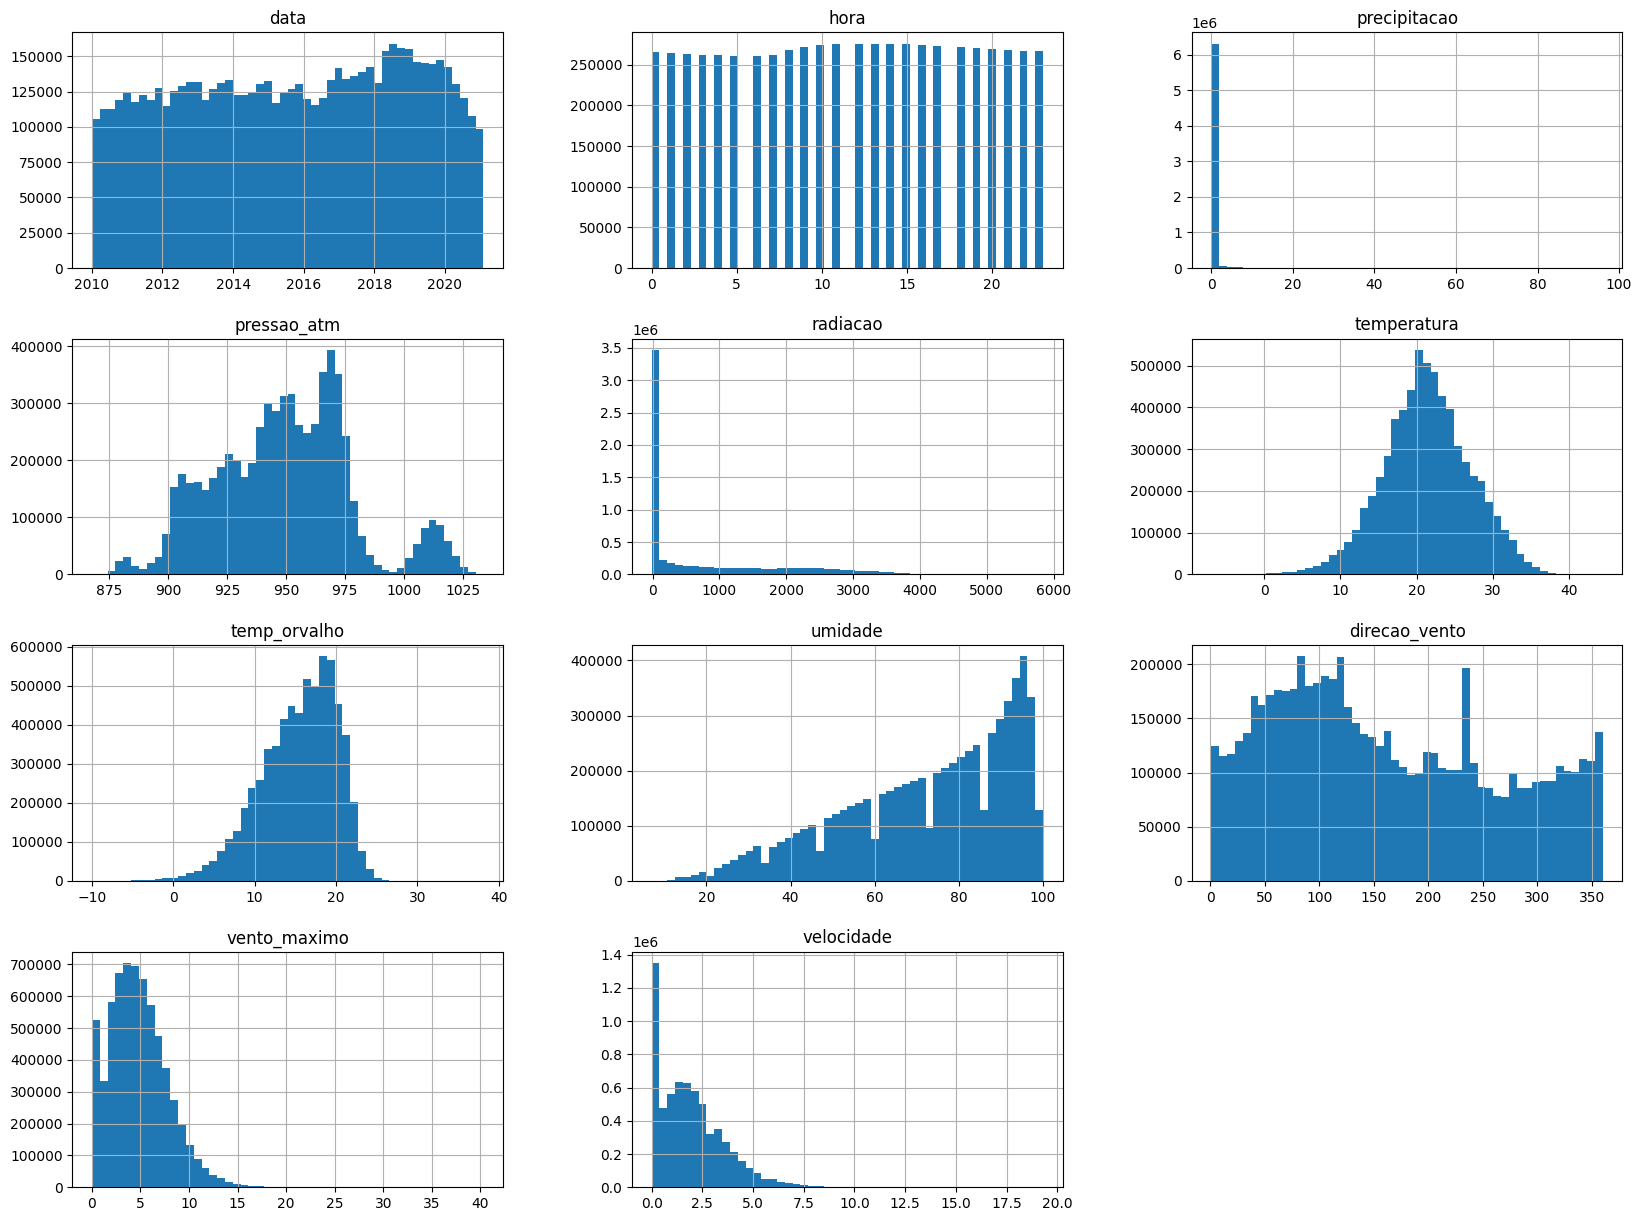

In [29]:
histogram_variables(data, 'figures/histogram_variables.pdf')

In [30]:
# Scatter of the target variable 'radiacao' with all variables

def scatter_variables(df, variable, filename=None):

    variables = df.columns.drop(variable)

    data = df[[variable] + list(variables)]

    sns.pairplot(data, x_vars=variables, y_vars=variable, height=2.5)

    plt.tight_layout()

    if filename is not None:
        plt.savefig(filename, dpi=500, bbox_inches='tight')

    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'figures/scatter_variables.png'

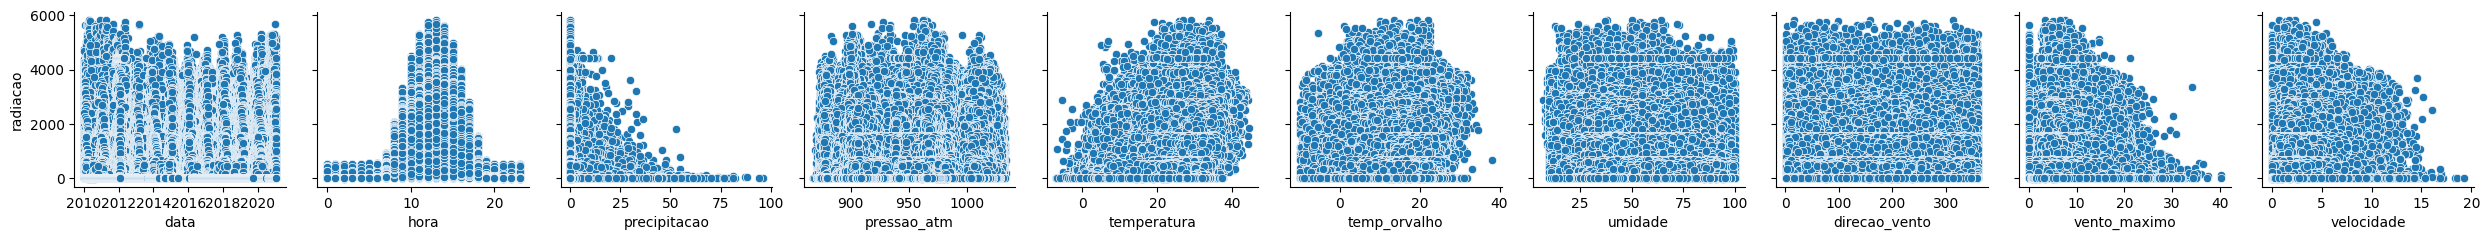

In [31]:
scatter_variables(data, 'radiacao', 'figures/scatter_variables.png')

In [32]:
# Skewness values

data.skew(axis = 0)

hora             -0.019247
precipitacao     16.409922
pressao_atm       0.214678
radiacao          1.291223
temperatura      -0.096679
temp_orvalho     -0.661807
umidade          -0.673284
direcao_vento     0.342728
vento_maximo      0.702478
velocidade        1.017682
dtype: float64

In [33]:
# Pearson correlation

def pearson_correlation_map(df, filename=None):

    plt.figure(figsize = (12,8))

    sns.heatmap(df.corr(), annot = True, fmt = '.4f', cmap = 'Reds', vmax = .99, vmin = -0.60)

    if filename is not None:
        plt.savefig(filename, format='pdf', bbox_inches='tight')

    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'figures/pearson_correlation_map.pdf'

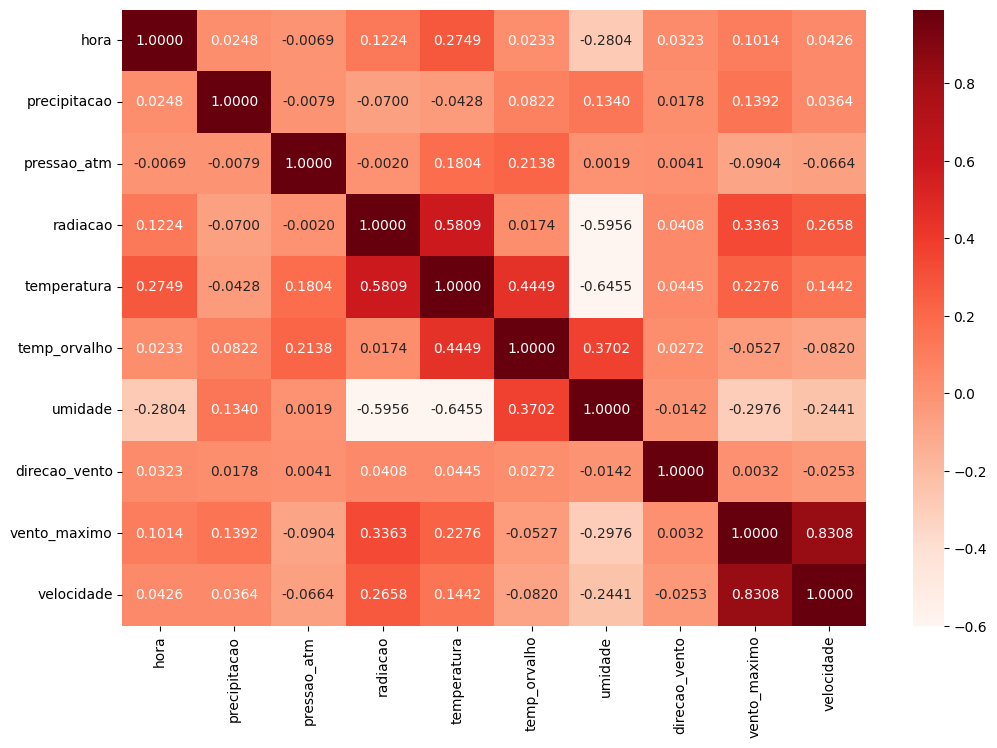

In [34]:
# Pearson correlation plot

pearson_correlation_map(data, 'figures/pearson_correlation_map.pdf')

In [36]:
# Check multicollinearity problem

df_correlation = data.corr()

df_correlation = df_correlation[((df_correlation >= .65) | (df_correlation <= -.65)) & (df_correlation !=1.000)]
df_correlation = df_correlation.drop('radiacao', axis=1)
df_correlation = df_correlation.drop('radiacao', axis=0)

df_correlation

,hora,precipitacao,pressao_atm,temperatura,temp_orvalho,umidade,direcao_vento,vento_maximo,velocidade
hora,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
precipitacao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pressao_atm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temperatura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temp_orvalho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
umidade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
direcao_vento,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vento_maximo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830805
velocidade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830805,NaN


In [ ]:
# As there is a high correlation between 'vento_maximo' and 'velocidade' 
# let's remove 'velocidade' from the analysis, because it has the lowest correlation with 'radiacao'

---

#### **Step 3 - data normalization and division**

---



##### Step 3.1 - normalization

In [37]:
# StardartScaler

def norm_std(df, variables):

    scaler_lab = StandardScaler()
    scaler_lab.fit(df[variables])
    scaled_features_lab = scaler_lab.transform(df[variables])

    data_std = pd.DataFrame(scaled_features_lab, columns = variables, index = df.index)

    return data_std

In [38]:
# MinMaxScaler

def norm_minmax(df, variables):

    data_minmax = df.copy()

    scaler_lab = MinMaxScaler()

    data_minmax[variables] = scaler_lab.fit_transform(data_minmax[variables])

    return data_minmax

In [39]:
# Creating a data backup, with the variable 'data'

backup_data = pd.DataFrame({'radiacao': data['radiacao'],
                            'data': data['data'],
                            'hora': data['hora'],
                            'precipitacao': data['precipitacao'],
                            'pressao_atm': data['pressao_atm'],
                            'temperatura': data['temperatura'],
                            'temp_orvalho': data['temp_orvalho'],
                            'umidade': data['umidade'],
                            'direcao_vento': data['direcao_vento'],
                            'vento_maximo': data['vento_maximo']})

In [40]:
# Dataframe wiithou the variable 'data' beacause we keep this to the future steps of testins

data2 = pd.DataFrame({'radiacao': data['radiacao'],
                    'hora': data['hora'],
                    'precipitacao': data['precipitacao'],
                    'pressao_atm': data['pressao_atm'],
                    'temperatura': data['temperatura'],
                    'temp_orvalho': data['temp_orvalho'],
                    'umidade': data['umidade'],
                    'direcao_vento': data['direcao_vento'],
                    'vento_maximo': data['vento_maximo']})

In [41]:
# Variables list

variables = ['radiacao', 'hora', 'precipitacao', 'pressao_atm', 'temperatura', 'temp_orvalho', 'umidade', 'direcao_vento', 'vento_maximo']

In [42]:
# Boxplot figure to the variables of the data

def boxplots_variables(df, filename=None):

    melted_df = df.melt(value_vars=df, var_name='Variable', value_name='Values')

    sns.catplot(data=melted_df, x='Variable', y='Values', kind='box', height=8, aspect=1.5)

    plt.tight_layout()

    if filename is not None:
        plt.savefig(filename, dpi=500, bbox_inches='tight')

    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'figures/bloxplot_data_std.png'

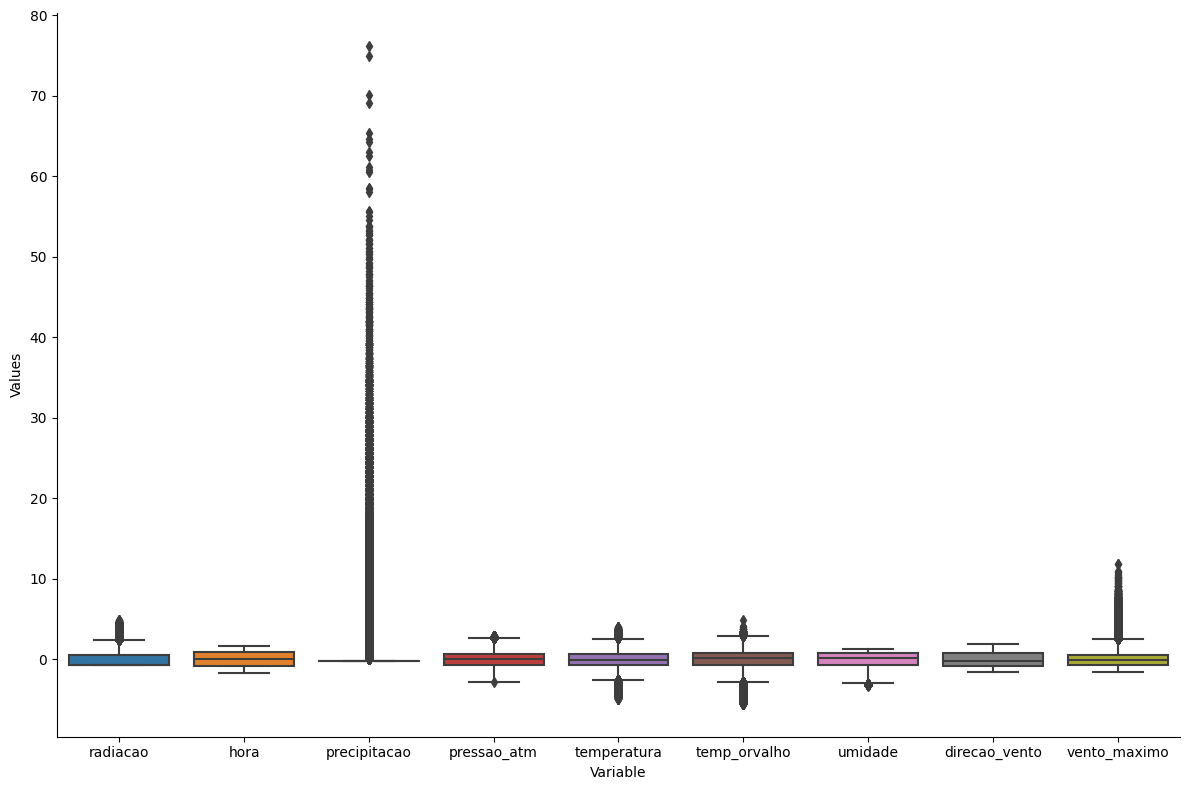

In [43]:
# STD normalization and bloxplot

data_std = norm_std(data2, variables)

boxplots_variables(data_std, 'figures/bloxplot_data_std.png')

FileNotFoundError: [Errno 2] No such file or directory: 'figures/bloxplot_data_minmax.png'

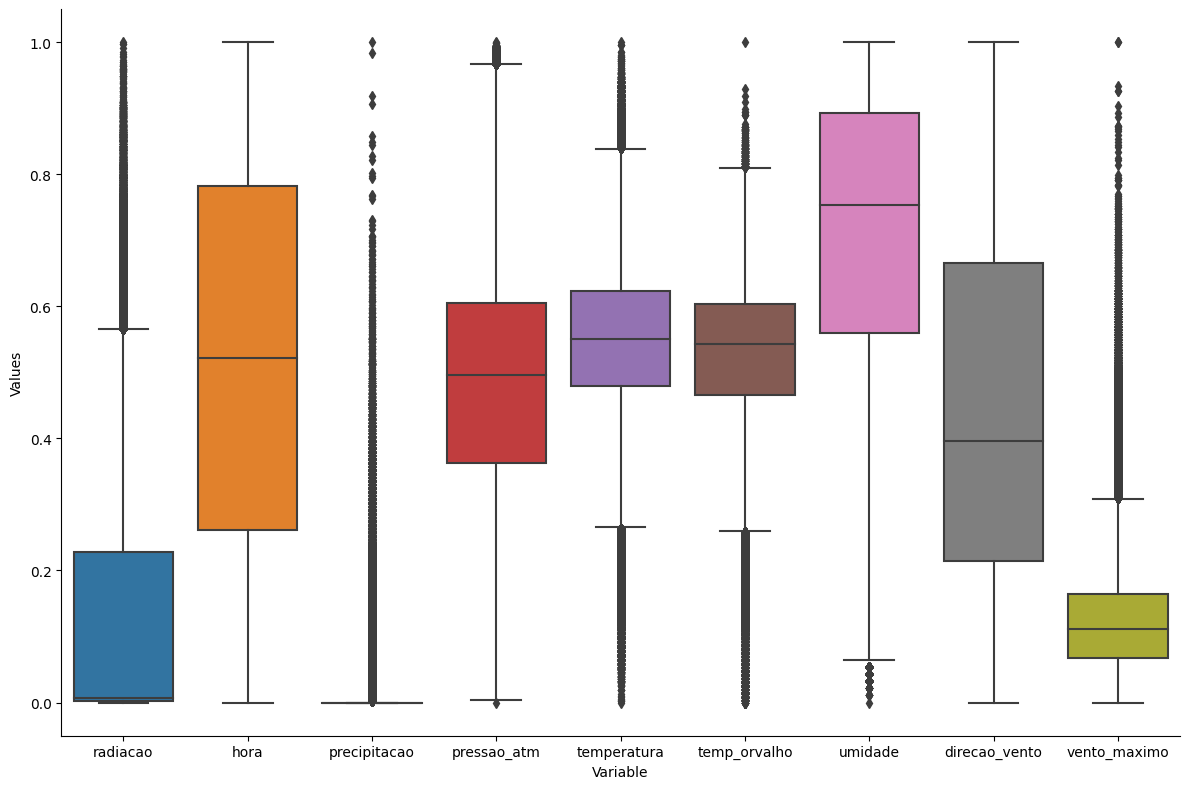

In [44]:
# MINMAX normalization and boxplot

data_minmax = norm_minmax(data2, variables)

boxplots_variables(data_minmax, 'figures/bloxplot_data_minmax.png')

##### Step 3.2 - data division

70% -> train

20% -> test

10% -> validation

In [45]:
def data_divide(df):

    X = df[['hora', 'precipitacao', 'pressao_atm', 'temperatura', 'temp_orvalho', 'umidade', 'direcao_vento', 'vento_maximo']].values
    y = df.radiacao.values.reshape(-1,1)

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.125, random_state=42)

    return x_train, y_train, x_test, y_test, x_valid, y_valid

In [46]:
# StandartScaler

x_train_std, y_train_std, x_test_std, y_test_std, x_valid_std, y_valid_std = data_divide(data_std)

# Checking division

print('train 70% =', len(y_train_std))
print('test 20%  =', len(y_test_std))
print('validation 10% =', len(y_valid_std))

print(len(data_std), '=', len(y_train_std)+len(y_test_std)+len(y_valid_std))

train 70% = 4519277
test 20%  = 1291223
validation 10% = 645611
6456111 = 6456111


In [47]:
# MinMaxScaler

x_train_minmax, y_train_minmax, x_test_minmax, y_test_minmax, x_valid_minmax, y_valid_minmax = data_divide(data_minmax)

# Checking division

print('train 70% =', len(y_train_minmax))
print('test 20%  =', len(y_test_minmax))
print('validation 10% =', len(y_valid_minmax))

print(len(data_std), '=', len(y_train_minmax)+len(y_test_minmax)+len(y_valid_minmax))

train 70% = 4519277
test 20%  = 1291223
validation 10% = 645611
6456111 = 6456111


---

#### **Step 4 - Machine Learning models training**

---


In [ ]:
# Testing, error calculator and dataframe function

def model_test(model, x_test, y_test):

    y_pred = model.predict(x_test)

    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = metrics.r2_score(y_test, y_pred)

    print('-'*60)
    print('Mean Absolute Error:', MAE)
    print('Mean Squared Error:', MSE)
    print('Root Mean Squared Error:', RMSE)
    print('R2 Score:', R2)

    y_test = np.array(y_test)
    y_pred = np.array(y_pred)

    df_determined = pd.DataFrame({'measured_rad': y_test.flatten(), 'determined_rad': y_pred.flatten()})

    print('-'*60)
    print(df_determined)
    print('-'*60)

    return df_determined

##### Step 4.1 - Multilayer Perceptron Regressor (MLPR)

In [ ]:
# Training function

def model_mlpr(x_train, y_train):

    model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
    
    model.fit(x_train, y_train)

    return model

In [ ]:
# STD MLPR

In [ ]:
control_mlpr_std = 0

if control_mlpr_std == 1:

    model_mlpr_std = model_mlpr(x_train_std, y_train_std)

    joblib.dump(model_mlpr_std, 'ml_models/model_mlpr_std.pkl')

In [ ]:
control_mlpr_std_test = 0

if control_mlpr_std_test == 1:

    df_determined_mlpr_std = model_test(model_mlpr_std, x_test_std, y_test_std)

In [ ]:
# MINMAX MLPR

In [ ]:
control_mlpr_minmax = 0

if control_mlpr_minmax == 1:

    model_mlpr_minmax = model_mlpr(x_train_minmax, y_train_minmax)

    joblib.dump(model_mlpr_minmax, 'ml_models/modelo_mlpr_minmax.pkl')

In [ ]:
control_mlpr_minmax_test = 0

if control_mlpr_minmax_test == 1:

    df_determined_mlpr_minmax = model_test(model_mlpr_minmax, x_test_minmax, y_test_minmax)

##### Step 4.2 - Decision Tree Regressor (DTR)

In [ ]:
# Training function

def model_dtr(x_train, y_train):

    model = DecisionTreeRegressor(max_depth=100, min_samples_leaf=2, random_state = 42)

    model.fit(x_train, y_train)

    return model

In [ ]:
# STD DTR

In [ ]:
control_dtr_std = 0

if control_dtr_std == 1:

    model_dtr_std = model_dtr(x_train_std, y_train_std)
    
    joblib.dump(model_dtr_std, 'ml_models/model_dtr_std.pkl')

In [ ]:
control_dtr_std_test = 0

if control_dtr_std_test == 1:
    
    df_determined_dtr_std = model_test(model_dtr_std, x_test_std, y_test_std)

In [ ]:
# MINMAX DTR

In [ ]:
control_dtr_minmax = 0

if control_dtr_minmax == 1:

    model_dtr_minmax = model_dtr(x_train_minmax, y_train_minmax)
    
    joblib.dump(model_dtr_minmax, 'ml_models/model_dtr_minmax.pkl')

In [ ]:
control_dtr_minmax_test = 0

if control_dtr_minmax_test == 1:

    df_determined_dtr_minmax = model_test(model_dtr_minmax, x_test_minmax, y_test_minmax)

##### Step 4.3 - Random Forest Regressor (RFR)

In [ ]:
# Training function

def model_rfr(x_train, y_train):

    model = RandomForestRegressor(n_estimators=100, max_depth=50, min_samples_leaf=2, random_state = 42)

    model.fit(x_train, y_train)

    return model

In [ ]:
# STD RFR

In [ ]:
control_rfr_std = 0

if control_rfr_std == 1:

    model_rfr_std = model_rfr(x_train_std, y_train_std)
    
    joblib.dump(model_rfr_std, 'ml_models/model_rfr_std.pkl')

In [ ]:
control_rfr_std_test = 0

if control_rfr_std_test == 1:
    
    df_determined_rfr_std = model_test(model_rfr_std, x_test_std, y_test_std)

In [ ]:
# MINMAX RFR

In [ ]:
control_rfr_minmax = 1

if control_rfr_minmax == 1:

    model_rfr_minmax = model_rfr(x_train_minmax, y_train_minmax)

    joblib.dump(control_rfr_minmax, 'ml_models/model_rfr_minmax.pkl')

In [ ]:
control_rfr_minmax_test = 1

if control_rfr_minmax_test == 1:

    df_determined_rfr_minmax = model_test(model_rfr_minmax, x_test_minmax, y_test_minmax)

##### Step 4.4 - K Nearest Neighbors Regressor (KNN)

In [ ]:
# Training function

def model_knn(x_train, y_train):

    model = KNeighborsRegressor(n_neighbors=3, leaf_size=30, weights='distance', algorithm='auto', metric='euclidean')
    
    model.fit(x_train, y_train)

    return model

In [ ]:
# STD KNN

In [ ]:
control_knn_std = 0

if control_knn_std == 1:

    model_knn_std = model_knn(x_train_std, y_train_std)
    
    joblib.dump(model_knn_std, 'ml_models/model_knn_std.pkl')

In [ ]:
control_knn_std_test = 0

if control_knn_std_test == 1:
    
    df_determined_knn_std = model_test(model_knn_std, x_test_std, y_test_std)

In [ ]:
# MINMAX KNN

In [ ]:
control_knn_minmax = 0

if control_knn_minmax == 1:

    model_knn_minmax = model_knn(x_train_minmax, y_train_minmax)

    joblib.dump(model_knn_minmax, 'ml_models/model_knn_minmax.pkl')

In [ ]:
control_knn_minmax_test = 0

if control_knn_minmax_test == 1:

    df_determined_knn_minmax = model_test(model_knn_minmax, x_test_minmax, y_test_minmax)

##### Step 4.5 - Results

In [ ]:
##########################################################################################################################
# ====================================================================================================================== #
# | ML with data STD normalization                             | | ML with data MINMAX normalization                   | #
# ====================================================================================================================== #
#                                                                                                                        #
# MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)                          #
# DecisionTreeRegressor(max_depth=100, min_samples_leaf=2, random_state = 42)                                            #
# RandomForestRegressor(n_estimators=100, max_depth=50, min_samples_leaf=2, random_state = 42)                           #
# KNeighborsRegressor(n_neighbors=3, leaf_size=30, weights='distance', algorithm='auto', metric='euclidean')             #
#                                                                                                                        #
# ====================================================================================================================== #
# |      |                 | *MLPR* | *DTR*  | *RFR*  | *KNN*  | |                 | *MLPR* | *DTR*  | *RFR*  | *KNN*  | #
# ---------------------------------------------------------------------------------------------------------------------- #
# | MAE  |                 | 0.1767 | 0.2282 | 0.1692 | 0.1999 | |                 | 0.0319 | 0.0410 | 0.0304 | 0.0344 | #
# ---------------------------------------------------------------------------------------------------------------------- #
# | MSE  |                 | 0.1109 | 0.2035 | 0.1111 | 0.1489 | |                 | 0.0036 | 0.0065 | 0.0035 | 0.0046 | #
# ---------------------------------------------------------------------------------------------------------------------- #
# | RMSE |                 | 0.3331 | 0.4512 | 0.3334 | 0.3859 | |                 | 0.0605 | 0.0811 | 0.0599 | 0.0677 | #
# ---------------------------------------------------------------------------------------------------------------------- #
# | R2   |                 | 0.8889 | 0.7963 | 0.8887 | 0.8510 | |                 | 0.8865 | 0.7962 | 0.8887 | 0.8580 | #
# ---------------------------------------------------------------------------------------------------------------------- #
# | ttrn |                 | 11m28s | 48.3s  | 61m45s | 19,3s  | |                 | 13m38s | 44.7s  | 61m40s | 16,7s  | #
# ---------------------------------------------------------------------------------------------------------------------- #
# | ttst |                 | 18.3s  | 1.0s   | 3m4s   | 5m33s  | |                 | 5s     | 1.0s   | 4m3.6s | 4m17s  | #
# ---------------------------------------------------------------------------------------------------------------------- #
##########################################################################################################################

---

#### **Step 5 - Variables selection to optimize the ML models**

---



##### Step 5.1 - Loading the models

In [ ]:
# STD

model_mlpr_std = joblib.load('ml_models/model_mlpr_std.pkl')
model_dtr_std = joblib.load('ml_models/model_dtr_std.pkl')
model_rfr_std = joblib.load('ml_models/model_rfr_std.pkl')
model_knn_std = joblib.load('ml_models/model_knn_std.pkl')

In [ ]:
# MINMAX

model_mlpr_minmax = joblib.load('ml_models/model_mlpr_minmax.pkl')
model_dtr_minmax = joblib.load('ml_models/model_dtr_minmax.pkl')
model_rfr_minmax = joblib.load('ml_models/model_rfr_minmax.pkl')
model_knn_minmax = joblib.load('ml_models/model_knn_minmax.pkl')

##### Step 5.2 - Filter - Permutation Importance

In [49]:
# Dataframe without the 'radiacao'

data_std_pi = data_std.copy()
data_std_pi.drop(data_std.columns[0],axis=1, inplace=True)

data_minmax_pi = data_minmax.copy()
data_minmax_pi.drop(data_minmax.columns[0],axis=1, inplace=True)

In [50]:
def perm_imp(data_x, model, x_train, y_train, filename=None):

    importance = permutation_importance(model, x_train, y_train, n_repeats=10, random_state=42)

    importance_mean = importance.importances_mean

    name_variables = data_x.columns

    print(name_variables)

    df_importance = pd.DataFrame({'Variables': name_variables, 'Importance': importance_mean})

    df_importance = df_importance.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(5, 3))
    plt.barh(df_importance['Variables'], df_importance['Importance'])
    plt.xlabel('Importance')
    plt.ylabel('Predictor Variables')
    plt.title(f'Importance no {model}')

    if filename is not None:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    
    plt.show()

In [ ]:
# Multilayer Perceptron Regressor (MLPR)

controle_pi_mlpr = 0

if controle_pi_mlpr == 1:

    perm_imp(data_std_pi, model_mlpr_std, x_train_std, y_train_std, None)

In [ ]:
# Decision Tree Regressor (DTR)

controle_pi_dtr = 0

if controle_pi_dtr == 1:

    perm_imp(data_std_pi, model_dtr_std, x_train_std, y_train_std, None)

In [ ]:
# Random Forest Regressor (RFR)

controle_pi_rfr = 0

if controle_pi_rfr == 1:

    perm_imp(data_std_pi, model_rfr_std, x_train_std, y_train_std, None)

In [ ]:
# K Nearest Neighbors Regressor (KNN)

controle_pi_knn = 0

if controle_pi_knn == 1:

    perm_imp(data_std_pi, model_knn_std, x_train_std, y_train_std, None)

##### Step 5.3 - Preparing Dataframes for training and testing models with Permutation Importance

In [ ]:
# Multilayer Perceptron Regressor (MLPR)

In [ ]:
data_mlpr_pi = pd.DataFrame({'radiacao': data2['radiacao'],
                            'hora': data2['hora'],
                            'temperatura': data2['temperatura'],
                            'umidade': data2['umidade']})

In [ ]:
variables_mlpr_pi = ['radiacao', 'hora', 'temperatura', 'umidade']

In [ ]:
data_mlpr_pi_std = norm_std(data_mlpr_pi, variables_mlpr_pi)

In [ ]:
x_train_mlpr_pi_std, y_train_mlpr_pi_std, x_test_mlpr_pi_std, y_test_mlpr_pi_std, x_valid_mlpr_pi_std, y_valid_mlpr_pi_std = data_divide(data_mlpr_pi_std)

In [ ]:
data_mlpr_pi_minmax = norm_minmax(data_mlpr_pi, variables_mlpr_pi)

In [ ]:
x_train_mlpr_pi_minmax, y_train_mlpr_pi_minmax, x_test_mlpr_pi_minmax, y_test_mlpr_pi_minmax, x_valid_mlpr_pi_minmax, y_valid_mlpr_pi_minmax = data_divide(data_mlpr_pi_minmax)

In [ ]:
# Decision Tree Regressor (DTR)

In [ ]:
data_dtr_pi = pd.DataFrame({'radiacao': data2['radiacao'],
                            'hora': data2['hora'],
                            'pressao_atm': data2['pressao_atm'],
                            'temperatura': data2['temperatura'],
                            'temp_orvalho': data2['temp_orvalho'],
                            'umidade': data2['umidade'],
                            'direcao_vento': data2['direcao_vento'],
                            'vento_maximo': data2['vento_maximo']})

In [ ]:
variables_dtr_pi = ['radiacao', 'hora', 'pressao_atm', 'temperatura', 'temp_orvalho', 'umidade', 'direcao_vento', 'vento_maximo']

In [ ]:
data_dtr_pi_std = norm_std(data_dtr_pi, variables_dtr_pi)

In [ ]:
x_train_dtr_pi_std, y_train_dtr_pi_std, x_test_dtr_pi_std, y_test_dtr_pi_std, x_valid_dtr_pi_std, y_valid_dtr_pi_std = data_divide(data_dtr_pi_std)

In [ ]:
data_dtr_pi_minmax = norm_minmax(data_dtr_pi, variables_dtr_pi)

In [ ]:
x_train_dtr_pi_minmax, y_train_dtr_pi_minmax, x_test_dtr_pi_minmax, y_test_dtr_pi_minmax, x_valid_dtr_pi_minmax, y_valid_dtr_pi_minmax = data_divide(data_dtr_pi_std)

In [ ]:
# Random Forest Regressor (RFR)

In [ ]:
data_rfr_pi = pd.DataFrame({'radiacao': data2['radiacao'],
                            'hora': data2['hora'],
                            'pressao_atm': data2['pressao_atm'],
                            'temperatura': data2['temperatura'],
                            'umidade': data2['umidade']})

In [ ]:
variables_rfr_pi = ['radiacao', 'hora', 'pressao_atm', 'temperatura', 'umidade']

In [ ]:
data_rfr_pi_std = norm_std(data_rfr_pi, variables_rfr_pi)

In [ ]:
x_train_rfr_pi_std, y_train_rfr_pi_std, x_test_rfr_pi_std, y_test_rfr_pi_std, x_valid_rfr_pi_std, y_valid_rfr_pi_std = data_divide(data_rfr_pi_std)

In [ ]:
data_rfr_pi_minmax = norm_minmax(data_rfr_pi, variables_rfr_pi)

In [ ]:
x_train_rfr_pi_minmax, y_train_rfr_pi_minmax, x_test_rfr_pi_minmax, y_test_rfr_pi_minmax, x_valid_rfr_pi_minmax, y_valid_rfr_pi_minmax = data_divide(data_rfr_pi_minmax)

In [ ]:
# K Nearest Neighbors Regressor (KNN)

In [ ]:
data_knn_pi = pd.DataFrame({'radiacao': data2['radiacao'],
                            'hora': data2['hora'],
                            'temperatura': data2['temperatura'],
                            'umidade': data2['umidade']})

In [ ]:
variables_knn_pi = ['radiacao', 'hora', 'temperatura', 'umidade']

In [ ]:
data_knn_pi_std = norm_std(data_rfr_pi, variables_rfr_pi)

In [ ]:
x_train_knn_pi_std, y_train_knn_pi_std, x_test_knn_pi_std, y_test_knn_pi_std, x_valid_knn_pi_std, y_valid_knn_pi_std = data_divide(data_knn_pi_std)

In [ ]:
data_knn_pi_minmax = norm_minmax(data_rfr_pi, variables_rfr_pi)

In [ ]:
x_train_knn_pi_minmax, y_train_knn_pi_minmax, x_test_knn_pi_minmax, y_test_knn_pi_minmax, x_valid_knn_pi_minmax, y_valid_knn_pi_minmax = data_divide(data_knn_pi_minmax)

##### Step 5.4 - Machine Learning models training with Permutation Importance

In [ ]:
# Multilayer Perceptron Regressor (MLPR)

In [ ]:
# STD MLPR

In [ ]:
control_mlpr_pi_std = 0

if control_mlpr_pi_std == 1:
    
    model_mlpr_pi_std = model_mlpr(x_train_mlpr_pi_std, y_train_mlpr_pi_std)

    joblib.dump(model_mlpr_pi_std, 'ml_models/model_mlpr_pi_std.pkl')

In [ ]:
control_mlpr_pi_std_test = 0

if control_mlpr_pi_std_test == 1:

    df_determined_mlpr_pi_std = model_test(model_mlpr_pi_std, x_test_mlpr_pi_std, y_test_mlpr_pi_std)

In [ ]:
# MINMAX MLPR

In [ ]:
control_mlpr_pi_minmax = 0

if control_mlpr_pi_minmax == 1:
    
    model_mlpr_pi_minmax = model_mlpr(x_train_mlpr_pi_minmax, y_train_mlpr_pi_minmax)

    joblib.dump(model_mlpr_pi_minmax, 'ml_models/model_mlpr_pi_minmax.pkl')

In [ ]:
control_mlpr_pi_minmax_test = 0

if control_mlpr_piminmaxd_test == 1:

    df_determined_mlpr_pi_minmax = model_test(model_mlpr_pi_minmax, x_test_mlpr_pi_minmax, y_test_mlpr_pi_minmax)

In [ ]:
# Decision Tree Regressor (DTR)

In [ ]:
# STD DTR

In [ ]:
control_dtr_pi_std = 0

if control_dtr_pi_std == 1:
    
    model_dtr_pi_std = model_dtr(x_train_dtr_pi_std, y_train_dtr_pi_std)

    joblib.dump(model_dtr_pi_std, 'ml_models/model_dtr_pi_std.pkl')

In [ ]:
control_dtr_pi_std_test = 0

if control_dtr_pi_std_test == 1:

    df_determined_dtr_pi_std = model_test(model_dtr_pi_std, x_test_dtr_pi_std, y_test_dtr_pi_std)

In [ ]:
# MINMAX DTR

In [ ]:
control_dtr_pi_minmax = 0

if control_dtr_pi_minmax == 1:
    
    model_dtr_pi_minmax = model_dtr(x_train_dtr_pi_minmax, y_train_dtr_pi_minmax)

    joblib.dump(model_dtr_pi_minmax, 'ml_models/model_dtr_pi_minmax.pkl')

In [ ]:
control_dtr_pi_minmax_test = 0

if control_dtr_pi_minmax_test == 1:

    df_determined_dtr_pi_minmax = model_test(model_dtr_pi_minmax, x_test_dtr_pi_minmax, y_test_dtr_pi_minmax)

In [ ]:
# Random Forest Regressor (RFR)

In [ ]:
# STD RFR

In [ ]:
control_rfr_pi_std = 0

if control_rfr_pi_std == 1:
    
    model_rfr_pi_std = model_rfr(x_train_rfr_pi_std, y_train_rfr_pi_std)

    joblib.dump(model_rfr_pi_std, 'ml_models/model_rfr_pi_std.pkl')

In [ ]:
control_rfr_pi_std_test = 0

if control_rfr_pi_std_test == 1:

    df_determined_rfr_pi_std = model_test(model_rfr_pi_std, x_test_rfr_pi_std, y_test_rfr_pi_std)

In [ ]:
# MINMAX RFR

In [ ]:
control_rfr_pi_minmax = 0

if control_rfr_pi_minmax == 1:
    
    model_rfr_pi_minmax = model_rfr(x_train_rfr_pi_minmax, y_train_rfr_pi_minmax)

    joblib.dump(model_rfr_pi_minmax, 'ml_models/model_rfr_pi_minmax.pkl')

In [ ]:
control_rfr_pi_minmax_test = 0

if control_rfr_pi_minmax_test == 1:

    df_determined_rfr_pi_minmax = model_test(model_rfr_pi_minmax, x_test_rfr_pi_minmax, y_test_rfr_pi_minmax)

In [ ]:
# K Nearest Neighbors Regressor (KNN)

In [ ]:
# STD KNN

In [ ]:
control_knn_pi_std = 0

if control_knn_pi_std == 1:
    
    model_knn_pi_std = model_knn(x_train_knn_pi_std, y_train_knn_pi_std)

    joblib.dump(model_knn_pi_std, 'ml_models/model_knn_pi_std.pkl')

In [ ]:
control_knn_pi_std_test = 0

if control_knn_pi_std_test == 1:

    df_determined_knn_pi_std = model_test(model_knn_pi_std, x_test_knn_pi_std, y_test_knn_pi_std)

In [ ]:
# MINMAX KNN

In [ ]:
control_knn_pi_minmax = 0

if control_knn_pi_minmax == 1:
    
    model_knn_pi_minmax = model_knn(x_train_knn_pi_minmax, y_train_knn_pi_minmax)

    joblib.dump(model_knn_pi_minmax, 'ml_models/model_knn_pi_minmax.pkl')

In [ ]:
control_knn_pi_minmax_test = 0

if control_knn_pi_minmax_test == 1:

    df_determined_knn_pi_minmax = model_test(model_knn_pi_minmax, x_test_knn_pi_minmax, y_test_knn_pi_minmax)

##### Step 5.5 - Results

In [ ]:
##########################################################################################################################
# ====================================================================================================================== #
# | ML with data STD normalization                             | | ML with data MINMAX normalization                   | #
# ====================================================================================================================== #
#                                                                                                                        #
# MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)                          #
# 'hora', 'temperatura', 'umidade'                                                                                       #
#                                                                                                                        #
# DecisionTreeRegressor(max_depth=100, min_samples_leaf=2, random_state = 42)                                            #
# 'hora', 'pressao_atm', 'temperatura', 'temp_orvalho', 'umidade', 'direcao_vento', 'vento_maximo'                       #
#                                                                                                                        #
# RandomForestRegressor(n_estimators=100, max_depth=50, min_samples_leaf=2, random_state = 42)                           #
# 'hora', 'pressao_atm', 'temperatura', 'umidade'                                                                        #
#                                                                                                                        #
# KNeighborsRegressor(n_neighbors=3, leaf_size=30, weights='distance', algorithm='auto', metric='euclidean')             #
# 'hora', 'temperatura', 'umidade'                                                                                       #
#                                                                                                                        #
# ====================================================================================================================== #
# |      |                 | *MLPR* | *DTR*  | *RFR*  | *KNN*  | |                 | *MLPR* | *DTR*  | *RFR*  | *KNN*  | #
# ---------------------------------------------------------------------------------------------------------------------- #
# | MAE  |                 | 0.1863 | 0.2292 | 0.1847 | 0.2141 | |                 | 0.0335 | 0.0412 | 0.0332 | 0.0385 | #
# ---------------------------------------------------------------------------------------------------------------------- #
# | MSE  |                 | 0.1264 | 0.2042 | 0.1290 | 0.1702 | |                 | 0.0041 | 0.0066 | 0.0041 | 0.0055 | #
# ---------------------------------------------------------------------------------------------------------------------- #
# | RMSE |                 | 0.3556 | 0.4519 | 0.3592 | 0.4126 | |                 | 0.0640 | 0.0812 | 0.0645 | 0.0742 | #
# ---------------------------------------------------------------------------------------------------------------------- #
# | R2   |                 | 0.8734 | 0.7956 | 0.8709 | 0.8297 | |                 | 0.8728 | 0.7955 | 0.8709 | 0.8296 | #
# ---------------------------------------------------------------------------------------------------------------------- #
# | ttrn |                 | 12m9s  | 40.9s  | 30m12s | 9,8s   | |                 | 10m55s | 40.9s  | 31m22s | 9,4s   | #
# ---------------------------------------------------------------------------------------------------------------------- #
# | ttst |                 | 6.5s   | 1.0s   | 4m46s  | 25,2s  | |                 | 4.1s   | 1.0s   | 4m46s  | 32,4s  | #
# ---------------------------------------------------------------------------------------------------------------------- #
##########################################################################################################################

In [5]:
# By the maintenance on values of errors and precision (R2)
# and the significant reduce of variables quantities in some ML models
# we'll keep this variables to optimize the parameters

---

#### **Step 6 - Optimization of parameters of ML models**

---


In [51]:
# Function of optimization

def grid_search_cv_model(model, x_train, x_test, y_train, y_test, parameters_grid, filename=None):

    grid_search = GridSearchCV(estimator=model, parameters_grid=parameters_grid, scoring='neg_mean_squared_error', cv=10)

    grid_search.fit(x_train, y_train)

    best_parameters = grid_search.best_params_

    performance = grid_search.score(x_test, y_test)

    print("Best parameters:", best_parameters)
    print("Performance:", performance)

    print('-'*60)
    cvres = grid_search.cv_results_
    for mean_score, parameters_grid in zip(cvres["mean_test_score"], cvres["params"]):
        print(np.sqrt(-mean_score), parameters_grid)

    result_grid_search_cv = pd.DataFrame(grid_search.cv_results_)

    if filename is not None:
        result_grid_search_cv.to_csv(filename, index=False)

##### Step 6.1 - Multilayer Perceptron Regressor (MLPR)

In [ ]:
parameters_grid_mlpr_1 = {
    'hidden_layer_sizes': [(15, 8), (30, 15), (60, 30)],
    'activation': ['relu'], 
    'solver': ['adam'],
    'random_state': [42]
}

model_mlpr_opt_1 = MLPRegressor()

grid_search_cv_model(model_mlpr_opt_1, x_train_mlpr_pi_std, x_test_mlpr_pi_std, y_train_mlpr_pi_std, y_test_mlpr_pi_std, parameters_grid_mlpr_1, 'ml_models/result_grid_search_cv_mlpr_opt_1.csv')

In [ ]:
parameters_grid_mlpr_2 = {
    'hidden_layer_sizes': [(45, 15), (60, 30), (75, 45)],
    'activation': ['relu'], 
    'solver': ['adam'],
    'random_state': [42]
}

model_mlpr_opt_2 = MLPRegressor()

grid_search_cv_model(model_mlpr_opt_2, x_train_mlpr_pi_std, x_test_mlpr_pi_std, y_train_mlpr_pi_std, y_test_mlpr_pi_std, parameters_grid_mlpr_2, 'ml_models/result_grid_search_cv_mlpr_opt_2.csv')

In [6]:
# Times:
# model_mlpr_opt_1 = 102m56.5s
# model_mlpr_opt_2 = 171m12.7s

# Parameters: (hidden_layer_sizes=(60, 30), activation='relu', solver='adam', random_state=42)

In [ ]:
def model_mlpr_opt(x_train, y_train):

    model = MLPRegressor(hidden_layer_sizes=(60, 30), activation='relu', solver='adam', random_state=42)
    
    model.fit(x_train, y_train)

    return model

In [ ]:
# STD MLPR

In [ ]:
control_mlpr_opt_std = 0

if control_mlpr_opt_std == 1:
    
    model_mlpr_opt_std = model_mlpr_opt(x_train_mlpr_pi_std, y_train_mlpr_pi_std)

    joblib.dump(model_mlpr_opt_std, 'ml_models/model_mlpr_opt_std.pkl')

In [ ]:
control_mlpr_opt_std_test = 0

if control_mlpr_opt_std_test == 1:

    df_determined_mlpr_opt_std = model_test(model_mlpr_opt_std, x_test_mlpr_pi_std, y_test_mlpr_pi_std)

In [ ]:
# MINMAX MLPR

In [ ]:
control_mlpr_opt_minmax = 0

if control_mlpr_opt_minmax == 1:
    
    model_mlpr_opt_minmax = model_mlpr_opt(x_train_mlpr_pi_minmax, y_train_mlpr_pi_minmax)

    joblib.dump(model_mlpr_opt_minmax, 'ml_models/model_mlpr_opt_minmax.pkl')

In [ ]:
control_mlpr_opt_minmax_test = 0

if control_mlpr_opt_minmax_test == 1:

    df_determined_mlpr_opt_minmax = model_test(model_mlpr_opt_minmax, x_test_mlpr_pi_minmax, y_test_mlpr_pi_minmax)

##### Step 6.2 - Decision Tree Regressor (DTR)

In [ ]:
parameters_grid_dtr_1 = {
    'max_depth': [25, 50, 100],
    'min_samples_leaf': [1, 5, 10],
    'random_state': [42]
}

model_dtr_opt_1 = DecisionTreeRegressor()

grid_search_cv_model(model_dtr_opt_1, x_train_dtr_pi_std, x_test_dtr_pi_std, y_train_dtr_pi_std, y_test_dtr_pi_std, parameters_grid_dtr_1, 'ml_models/result_grid_search_cv_dtr_opt_1.csv')

In [ ]:
parameters_grid_dtr_2 = {
    'max_depth': [10, 17, 24],
    'min_samples_leaf': [5, 10, 15],
    'random_state': [42]
}

model_dtr_opt_2 = DecisionTreeRegressor()

grid_search_cv_model(model_dtr_opt_2, x_train_dtr_pi_std, x_test_dtr_pi_std, y_train_dtr_pi_std, y_test_dtr_pi_std, parameters_grid_dtr_2, 'ml_models/result_grid_search_cv_dtr_opt_2.csv')

In [ ]:
parameters_grid_dtr_3 = {
    'max_depth': [14, 17, 20],
    'min_samples_leaf': [15, 18, 21],
    'random_state': [42]
}

model_dtr_opt_3 = DecisionTreeRegressor()

grid_search_cv_model(model_dtr_opt_3, x_train_dtr_pi_std, x_test_dtr_pi_std, y_train_dtr_pi_std, y_test_dtr_pi_std, parameters_grid_dtr_3, 'ml_models/result_grid_search_cv_dtr_opt_3.csv')

In [ ]:
# Times:
# model_dtr_opt_1 = 54m36.3s
# model_dtr_opt_2 = 38m11.8s
# model_dtr_opt_3 = 32m24.3s

# Parameters: (max_depth=17, min_samples_leaf=18, random_state = 42)

In [ ]:
def model_dtr_opt(x_train, y_train):

    model = DecisionTreeRegressor(max_depth=17, min_samples_leaf=18, random_state = 42)

    model.fit(x_train, y_train)

    return model

In [ ]:
# STD DTR

In [ ]:
control_dtr_opt_std = 0

if control_dtr_opt_std == 1:
    
    model_dtr_opt_std = model_dtr_opt(x_train_dtr_pi_std, y_train_dtr_pi_std)

    joblib.dump(model_dtr_opt_std, 'ml_models/model_dtr_opt_std.pkl')

In [ ]:
control_dtr_opt_std_test = 0

if control_dtr_opt_std_test == 1:

    df_determined_dtr_opt_std = model_test(model_dtr_opt_std, x_test_dtr_pi_std, y_test_dtr_pi_std)

In [ ]:
# MINMAX DTR

In [ ]:
control_dtr_opt_minmax = 0

if control_dtr_opt_minmax == 1:
    
    model_dtr_opt_minmax = model_dtr_opt(x_train_dtr_pi_minmax, y_train_dtr_pi_minmax)

    joblib.dump(model_dtr_opt_minmax, 'ml_models/model_dtr_opt_minmax.pkl')

In [ ]:
control_dtr_opt_minmax_test = 0

if control_dtr_opt_minmax_test == 1:

    df_determined_dtr_opt_minmax = model_test(model_dtr_opt_minmax, x_test_dtr_pi_minmax, y_test_dtr_pi_minmax)

##### Step 6.3 - Random Forest Regressor (RFR)

In [ ]:
parameters_grid_rfr_1 = {
    'n_estimators': [30, 50, 70],
    'max_depth': [10, 25, 40],
    'min_samples_leaf': [1, 5, 10],
    'random_state': [42]
}

model_rfr_opt_1 = RandomForestRegressor()

grid_search_cv_model(model_rfr_opt_1, x_train_rfr_pi_std, x_test_rfr_pi_std, y_train_rfr_pi_std, y_test_rfr_pi_std, parameters_grid_rfr_1, 'ml_models/result_grid_search_cv_rfr_opt_1.csv')

In [ ]:
# Times:
# model_rfr_opt_1 = 2750m29.4s

# Parameters: (max_depth=25, min_samples_leaf=10, n_estimators=70, random_state=42)

In [ ]:
def model_rfr_opt(x_train, y_train):

    model = RandomForestRegressor(n_estimators=70, max_depth=25, min_samples_leaf=10, random_state = 42)

    model.fit(x_train, y_train)

    return model

In [ ]:
# STD RFR

In [ ]:
control_rfr_opt_std = 0

if control_rfr_opt_std == 1:
    
    model_rfr_opt_std = model_rfr_opt(x_train_rfr_pi_std, y_train_rfr_pi_std)

    joblib.dump(model_rfr_opt_std, 'ml_models/model_rfr_opt_std.pkl')

In [ ]:
control_rfr_opt_std_test = 0

if control_rfr_opt_std_test == 1:

    df_determined_rfr_opt_std = model_test(model_rfr_opt_std, x_test_rfr_pi_std, y_test_rfr_pi_std)

In [ ]:
# MINMAX RFR

In [ ]:
control_rfr_opt_minmax = 0

if control_rfr_opt_minmax == 1:
    
    model_rfr_opt_minmax = model_rfr_opt(x_train_rfr_pi_minmax, y_train_rfr_pi_minmax)

    joblib.dump(model_rfr_opt_minmax, 'ml_models/model_rfr_opt_minmax.pkl')

In [ ]:
control_rfr_opt_minmax_test = 0

if control_rfr_opt_minmax_test == 1:

    df_determined_rfr_opt_minmax = model_test(model_rfr_opt_minmax, x_test_rfr_pi_minmax, y_test_rfr_pi_minmax)

##### Step 6.4 - K Nearest Neighbors Regressor (KNN)

In [ ]:
parameters_grid_knn_1 = {
    'n_neighbors': [1, 3, 5, 7, 9, 11],
    'leaf_size': [30, 50, 70],
    'weights': ['distance'],
    'algorithm': ['auto'],
    'metric': ['euclidean']
}

model_knn_opt_1 = KNeighborsRegressor()

grid_search_cv_model(model_knn_opt_1, x_train_knn_pi_std, x_test_knn_pi_std, y_train_knn_pi_std, y_test_knn_pi_std, parameters_grid_knn_1, 'ml_models/result_grid_search_cv_knn_opt_1.csv')

In [ ]:
parameters_grid_knn_2 = {
    'n_neighbors': [11, 15, 19, 23, 27],
    'leaf_size': [10, 20, 30],
    'weights': ['distance'],
    'algorithm': ['auto'],
    'metric': ['euclidean']
}

model_knn_opt_2 = KNeighborsRegressor()

grid_search_cv_model(model_knn_opt_2, x_train_knn_pi_std, x_test_knn_pi_std, y_train_knn_pi_std, y_test_knn_pi_std, parameters_grid_knn_2, 'ml_models/result_grid_search_cv_knn_opt_2.csv')

In [ ]:
# Times:
# model_knn_opt_1 = 41m6.7s
# model_knn_opt_1 = 17m3,9s

# Parameters: (n_neighbors=70, leaf_size=50, weights='distance', algorithm='auto', metric='euclidean')

In [ ]:
def model_knn_opt(x_train, y_train):

    model = KNeighborsRegressor(n_neighbors=70, leaf_size=50, weights='distance', algorithm='auto', metric='euclidean')

    model.fit(x_train, y_train)

    return model

In [ ]:
# STD KNN

In [ ]:
control_knn_opt_std = 0

if control_knn_opt_std == 1:
    
    model_knn_opt_std = model_knn_opt(x_train_knn_pi_std, y_train_knn_pi_std)

    joblib.dump(model_knn_opt_std, 'ml_models/model_knn_opt_std.pkl')

In [ ]:
control_knn_opt_std_test = 0

if control_knn_opt_std_test == 1:

    df_determined_knn_opt_std = model_test(model_knn_opt_std, x_test_knn_pi_std, y_test_knn_pi_std)

In [ ]:
# MINMAX KNN

In [ ]:
control_knn_opt_minmax = 0

if control_knn_opt_minmax == 1:
    
    model_knn_opt_minmax = model_knn_opt(x_train_knn_pi_minmax, y_train_knn_pi_minmax)

    joblib.dump(model_knn_opt_minmax, 'ml_models/model_knn_opt_minmax.pkl')

In [ ]:
control_knn_opt_minmax_test = 0

if control_knn_opt_minmax_test == 1:

    df_determined_knn_opt_minmax = model_test(model_knn_opt_minmax, x_test_knn_pi_minmax, y_test_knn_pi_minmax)

##### Step 6.5 - Results

In [ ]:
##########################################################################################################################
# ====================================================================================================================== #
# | ML with data STD normalization                             | | ML with data MINMAX normalization                   | #
# ====================================================================================================================== #
#                                                                                                                        #
# MLPRegressor(hidden_layer_sizes=(60, 30), activation='relu', solver='adam', random_state=42)                           #
# 'hora', 'temperatura', 'umidade'                                                                                       #
#                                                                                                                        #
# DecisionTreeRegressor(max_depth=17, min_samples_leaf=18, random_state = 42)                                            #
# 'hora', 'pressao_atm', 'temperatura', 'temp_orvalho', 'umidade', 'direcao_vento', 'vento_maximo'                       #
#                                                                                                                        #
# RandomForestRegressor(n_estimators=70, max_depth=25, min_samples_leaf=10, random_state = 42)                           #
# 'hora', 'pressao_atm', 'temperatura', 'umidade'                                                                        #
#                                                                                                                        #
# KNeighborsRegressor(n_neighbors=27, leaf_size=10, weights='distance', algorithm='auto', metric='euclidean')            #
# 'hora', 'temperatura', 'umidade'                                                                                       #
#                                                                                                                        #
# ====================================================================================================================== #
# |      |                 | *MLPR* | *DTR*  | *RFR*  | *KNN*  | |                 | *MLPR* | *DTR*  | *RFR*  | *KNN*  | #
# ---------------------------------------------------------------------------------------------------------------------- #
# | MAE  |                 | 0.1869 | 0.1747 | 0.1766 | 0.1910 | |                 | 0.0333 | 0.0314 | 0.0317 | 0.0343 | #
# ---------------------------------------------------------------------------------------------------------------------- #
# | MSE  |                 | 0.1268 | 0.1171 | 0.1187 | 0.1360 | |                 | 0.0041 | 0.0037 | 0.0038 | 0.0043 | #
# ---------------------------------------------------------------------------------------------------------------------- #
# | RMSE |                 | 0.3562 | 0.3422 | 0.3446 | 0.3687 | |                 | 0.0642 | 0.0615 | 0.0619 | 0.0662 | #
# ---------------------------------------------------------------------------------------------------------------------- #
# | R2   |                 | 0.8730 | 0.8828 | 0.8812 | 0.8639 | |                 | 0.8721 | 0.8828 | 0.8812 | 0.8639 | #
# ---------------------------------------------------------------------------------------------------------------------- #
# | ttrn |                 | 7m21s  | 30.9s  | 16m51s | 12,5s  | |                 | 8m32s  | 32.0s  | 18m59s | 9,3s   | #
# ---------------------------------------------------------------------------------------------------------------------- #
# | ttst |                 | 3.2s   | 0.3s   | 37.2s  | 1m20s  | |                 | 3.6s   | 0.4s   | 39,3s  | 1m36s  | #
# ---------------------------------------------------------------------------------------------------------------------- #
##########################################################################################################################

---

#### **Step 7 - Cross validation of ML models optmize**

---



##### Step 7.1 - Loading ML optmize models

In [ ]:
# STD

model_mlpr_opt_std = joblib.load('ml_models/model_mlpr_opt_std.pkl')
model_dtr_opt_std = joblib.load('ml_models/model_dtr_opt_std.pkl')
model_rfr_opt_std = joblib.load('ml_models/model_rfr_opt_std.pkl')
model_knn_opt_std = joblib.load('ml_models/model_knn_opt_std.pkl')

In [ ]:
# MINMAX

model_mlpr_opt_minmax = joblib.load('ml_models/model_mlpr_opt_minmax.pkl')
model_dtr_opt_minmax = joblib.load('ml_models/model_dtr_opt_minmax.pkl')
model_rfr_opt_minmax = joblib.load('ml_models/model_rfr_opt_minmax.pkl')
model_knn_opt_minmax = joblib.load('ml_models/model_knn_opt_minmax.pkl')

##### Step 7.2 - Validation function

In [ ]:
def score_cross_val(model, x_valid, y_valid):

    scores = cross_val_score(model, x_valid, y_valid, scoring="neg_mean_squared_error", cv=10)

    y_pred = cross_val_predict(model, x_valid, y_valid, cv=10)

    POINTS = np.sqrt(-scores)
    MEAN = POINTS.mean()
    SD = POINTS.std()
    R2 = metrics.r2_score(y_valid, y_pred)

    print('-'*60)
    print('Score:', POINTS)
    print('Mean:', MEAN)
    print('Standard Deviation:', SD)
    print('R2:', R2)

##### Step 7.3 - Multilayer Perceptron Regressor (MLPR)

In [ ]:
# STD MLPR

In [ ]:
control_validation_mlpr_std = 0

if control_validation_mlpr_std == 1:
    
    score_cross_val(model_mlpr_opt_std, x_valid_mlpr_pi_std, y_valid_mlpr_pi_std)

In [ ]:
# MINMAX MLPR

In [ ]:
control_validation_mlpr_minmax = 0

if control_validation_mlpr_minmax == 1:
    
    score_cross_val(model_mlpr_opt_minmax, x_valid_mlpr_pi_minmax, y_valid_mlpr_pi_minmax)

##### Step 7.4 - Decision Tree Regressor (DTR)

In [ ]:
# STD DTR

In [ ]:
control_validation_dtr_std = 0

if control_validation_dtr_std == 1:
    
    score_cross_val(model_dtr_opt_std, x_valid_dtr_pi_std, y_valid_dtr_pi_std)

In [ ]:
# MINMAX DTR

In [ ]:
control_validation_dtr_minmax = 0

if control_validation_dtr_minmax == 1:
    
    score_cross_val(model_dtr_opt_minmax, x_valid_dtr_pi_minmax, y_valid_dtr_pi_minmax)

##### Step 7.5 - Random Forest Regressor (RFR)

In [ ]:
# STD RFR

In [ ]:
control_validation_rfr_std = 0

if control_validation_rfr_std == 1:
    
    score_cross_val(model_rfr_opt_std, x_valid_rfr_pi_std, y_valid_rfr_pi_std)

In [ ]:
# MINMAX RFR

In [ ]:
control_validation_rfr_minmax = 0

if control_validation_rfr_minmax == 1:
    
    score_cross_val(model_rfr_opt_minmax, x_valid_rfr_pi_minmax, y_valid_rfr_pi_minmax)

##### Step 7.6 - K Nearest Neighbors Regressor (KNN)

In [ ]:
# STD KNN

In [ ]:
control_validation_knn_std = 0

if control_validation_knn_std == 1:
    
    score_cross_val(model_knn_opt_std, x_valid_knn_pi_std, y_valid_knn_pi_std)

In [ ]:
# MINMAX KNN

In [ ]:
control_validation_knn_minmax = 0

if control_validation_knn_minmax == 1:
    
    score_cross_val(model_knn_opt_minmax, x_valid_knn_pi_minmax, y_valid_knn_pi_minmax)

##### Step 7.7 - Results

In [ ]:
##########################################################################################################################
# ====================================================================================================================== #
# | ML with data STD normalization                             | | ML with data MINMAX normalization                   | #
# ====================================================================================================================== #
#                                                                                                                        #
# MLPRegressor(hidden_layer_sizes=(60, 30), activation='relu', solver='adam', random_state=42)                           #
# 'hora', 'temperatura', 'umidade'                                                                                       #
#                                                                                                                        #
# DecisionTreeRegressor(max_depth=17, min_samples_leaf=18, random_state = 42)                                            #
# 'hora', 'pressao_atm', 'temperatura', 'temp_orvalho', 'umidade', 'direcao_vento', 'vento_maximo'                       #
#                                                                                                                        #
# RandomForestRegressor(n_estimators=70, max_depth=25, min_samples_leaf=10, random_state = 42)                           #
# 'hora', 'pressao_atm', 'temperatura', 'umidade'                                                                        #
#                                                                                                                        #
# KNeighborsRegressor(n_neighbors=27, leaf_size=10, weights='distance', algorithm='auto', metric='euclidean')            #
# 'hora', 'temperatura', 'umidade'                                                                                       #
#                                                                                                                        #
# ====================================================================================================================== #
# |      |             | *MLPR*  | *DTR*   | *RFR*   | *KNN*   | |             | *MLPR*  | *DTR*   | *RFR*   | *KNN*   | #
# ---------------------------------------------------------------------------------------------------------------------- #
# | mean |             | 0.35864 | 0.35789 | 0.34934 | 0.42009 | |             | 0.06504 | 0.06435 | 0.06281 | 0.07548 | #
# ---------------------------------------------------------------------------------------------------------------------- #
# | stdv |             | 0.00178 | 0.00204 | 0.00208 | 0.00201 | |             | 0.00044 | 0.00037 | 0.00037 | 0.00036 | #
# ---------------------------------------------------------------------------------------------------------------------- #
# | R2   |             | 0.87120 | 0.87173 | 0.87779 | 0.82328 | |             | 0.86897 | 0.87172 | 0.87779 | 0.82348 | #
# ---------------------------------------------------------------------------------------------------------------------- #
# | tvld |             | 1019,0  | 71,6    | 2119,0  | 72,6    | |             | 1218,9  | 60,6    | 2260,4  | 74,3    | #
# ---------------------------------------------------------------------------------------------------------------------- #
##########################################################################################################################

In [ ]:
# Based on the scores, errors and precision (R2) of ML models optimizeds
# the MLPR and DTR were choosed to next steps of evaluation with specifics tests

---

#### **Step 8 - Application of models**

---


In [53]:
model_mlpr_opt_std = joblib.load('E:/Projetos/IC_DADOS/modelo_mlpreg_otm_std.pkl')
model_dtr_opt_std = joblib.load('E:/Projetos/IC_DADOS/modelo_dtr_otm_std.pkl')
model_mlpr_opt_minmax = joblib.load('E:/Projetos/IC_DADOS/modelo_mlpreg_otm_minmax.pkl')
model_dtr_opt_minmax = joblib.load('E:/Projetos/IC_DADOS/modelo_dtr_otm_minmax.pkl')

##### 8.1 Analysis of most important variables

- 'hora', 
- 'pressao_atm', 
- 'temperatura', 
- 'temp_orvalho', 
- 'umidade', 
- 'direcao_vento', 
- 'vento_maximo'.

By each meteorological station, on a specific date by DD/MM/YYY

In [54]:
# Function to select the station

def select_station(string_station, data_stations):

    index_select_station = np.array(data_stations.index)

    for index in index_select_station:

        station = data_stations.loc[index, 'nome']

        if station == string_station:
            print(index, 'station', station)
            print(data_stations.loc[index])
            file = data_stations.loc[index, 'csv']

    print(file)

    result = pd.DataFrame()

    station_data = pd.read_csv(file, skiprows=10, delimiter=";", decimal=",")
    station_data.drop(station_data.columns[[4,5,6,8,11,12,13,14,15,16,17,22]],axis=1, inplace = True)
    station_data.dropna(inplace=True)

    result = pd.concat([result, station_data])

    result.rename(columns = {'Data Medicao': 'data'}, inplace = True)
    result['data'] = pd.to_datetime(result['data'])
    result.rename(columns = {'Hora Medicao': 'hora'}, inplace = True)
    result.rename(columns = {'PRECIPITACAO TOTAL, HORARIO(mm)': 'precipitacao'}, inplace = True)
    result.rename(columns = {'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA(mB)': 'pressao_atm'}, inplace = True)
    result.rename(columns = {'RADIACAO GLOBAL(Kj/m²)': 'radiacao'}, inplace = True)
    result.rename(columns = {'TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)': 'temperatura'}, inplace = True)
    result.rename(columns = {'TEMPERATURA DO PONTO DE ORVALHO(°C)': 'temp_orvalho'}, inplace = True)
    result.rename(columns = {'UMIDADE RELATIVA DO AR, HORARIA(%)': 'umidade'}, inplace = True)
    result.rename(columns = {'VENTO, DIRECAO HORARIA (gr)(° (gr))': 'direcao_vento'}, inplace = True)
    result.rename(columns = {'VENTO, RAJADA MAXIMA(m/s)': 'vento_maximo'}, inplace = True)
    result.rename(columns = {'VENTO, VELOCIDADE HORARIA(m/s)': 'velocidade'}, inplace = True)

    result = adjust_hour(result)
    result = remove_out(result)
    
    return result

In [55]:
# Function to return data by date
# year = 0; month = 1; day = 2

def data_by_date(df, type, date):
 
    if type == 0:
        df_date = df[df['data'].dt.year == data]
        
    if type == 1:
        df_date = df[df['data'].dt.month == data]
            
    if type == 2:
        df_date = df[df['data'].dt.day == data]
        
    return df_date

In [56]:
# Function to return data  by day/month/year

def data_by_ddmmyyyy(df, day, month, year):
    
    data_yyyy = data_by_date(df, 0, year)

    data_mmyyyy = data_by_date(data_yyyy, 1, month)

    data_ddmmyyyy = data_by_date(data_mmyyyy, 2, day)

    return data_ddmmyyyy

In [57]:
# Function to print station data and variables values

def variables_analysis_ddmmyyyy(string_station, data_stations, day, month, year, local_save):

    station = select_station(string_station, data_stations)

    data_station = data_by_ddmmyyyy(station, day, month, year)

    variables = ['temperatura', 'umidade', 'pressao_atm', 'direcao_vento', 'vento_maximo', 'temp_orvalho']
    colors = ['#FFC300', '#00D3FF', '#515151', '#C900FF', '#D954FD', '#EB8A00']
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

    i = 0

    for ax, variable in zip(axes.flat, variables):

        y_axis = data_station[variable]
        y_color = colors[i]

        ax.plot(data_station['hora'], y_axis, color=y_color)

        ax.grid(alpha=0.5)
        ax.set_xlabel('hora')
        ax.set_xticks(data_station['hora'])
        ax.set_ylabel(variable)
        ax.set_title(variable)

        i = i + 1

    fig.suptitle(f'Variables x hour {string_station} {day}/{month}/{year}')
    plt.subplots_adjust(wspace=0.2, hspace=0.4)
    plt.show()

    save_path = f'{local_save}/{string_station}_variables_{day}_{month}_{year}'

    if save_path is not None:
        plt.savefig(save_path, format='pdf')

In [68]:
variables_analysis_ddmmyyyy('NOVA FATIMA', selected_stations, 1, 1, 2010, 'figures_test')

489 station NOVA FATIMA
csv              E:/Projetos/IC_DADOS/dados_meteorologicos_copy...
nome                                                   NOVA FATIMA
codigo                                                        A842
latitude                                                -23.415278
longitude                                               -50.577778
altitude                                                    664.31
situacao                                                  Operante
data_inicio                                             2010-01-01
data_fim                                                2021-02-01
periodicidade                                              Horaria
Name: 489, dtype: object
E:/Projetos/IC_DADOS/dados_meteorologicos_copy\dados_A842_H_2010-01-01_2021-02-01.csv


MemoryError: Unable to allocate 3.77 TiB for an array with shape (80166, 6456111) and data type float64

##### 8.2 Analysis of precipitation

In [59]:
# Functions to select data of station by day, month and year separate

In [60]:
def data_year(df, year):
    
    data_year = data_by_date(df, 0, year)

    return data_year

In [61]:
def data_month_year(df, month, year):
    
    data_year = data_by_date(df, 0, year)

    data_month_year = data_by_date(data_year, 1, month)

    return data_month_year

In [62]:
def data_day_month_year(df, day, month, year):
    
    data_year = data_by_date(df, 0, year)

    data_month_year = data_by_date(data_year, 1, month)

    data_day_month_year = data_by_date(data_month_year, 2, day)

    return data_day_month_year

In [63]:
# Function linear plot

In [64]:
def linear_plot(df, x, y, title, save_path=None):

    plot = df.plot(x=x, y=y, figsize=(15, 5), color = '#0033FE')

    plot.grid(alpha=0.25)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)

    if save_path is not None:
        plt.savefig(save_path, format='pdf')

    plt.show()

In [65]:
def linear_plot_hour(df, y, title, save_path=None):

    plot = df.plot(x=x, y=y, figsize=(15, 5), color = '#0033FE')

    plot.grid(alpha=0.25)
    plt.xlabel('hora')
    plt.xticks(df['hora'])
    plt.ylabel(y)
    plt.title(title)

    if save_path is not None:
        plt.savefig(save_path, format='pdf')

    plt.show()

In [66]:
# Function to check precipitation values on a station in a day, month and year 

def check_precipitation(string_station, data_stations, day, month, year, local_save):

    station = select_station(string_station, data_stations)
    
    data_station_yyyy = data_year(station, year)
    data_station_mmyyyy = data_month_year(station, month, year)
    data_station_ddmmyyyy = data_day_month_year(station, day, month, year)

    linear_plot(data_station_yyyy, 'data', 'precipitacao', f'Precipitation {string_station} {year}', None)
    linear_plot(data_station_mmyyyy, 'data', 'precipitacao', f'Precipitation {string_station} {month}/{year}', None)
    linear_plot_hour(data_station_ddmmyyyy, 'precipitacao', f'Precipitation {string_station} {day}/{month}/{year}', None)


In [67]:
check_precipitation('NOVA FATIMA', selected_stations, 1, 1, 2010, 'figures_test')

489 station NOVA FATIMA
csv              E:/Projetos/IC_DADOS/dados_meteorologicos_copy...
nome                                                   NOVA FATIMA
codigo                                                        A842
latitude                                                -23.415278
longitude                                               -50.577778
altitude                                                    664.31
situacao                                                  Operante
data_inicio                                             2010-01-01
data_fim                                                2021-02-01
periodicidade                                              Horaria
Name: 489, dtype: object
E:/Projetos/IC_DADOS/dados_meteorologicos_copy\dados_A842_H_2010-01-01_2021-02-01.csv


MemoryError: Unable to allocate 3.77 TiB for an array with shape (80166, 6456111) and data type float64

##### 8.3 Determination of radiation solar value in a specify date

In this plot, is showing all info about models, values of test and plots

In [69]:
# Function to prepare and normalize data to model

In [70]:
def data_station_to_ml(name_model, df):

    variables_mlpr = ['radiacao', 'hora', 'temperatura', 'umidade']

    if name_model == 'MLPR':

        df_mlpr = pd.DataFrame({'radiacao': df['radiacao'],
                                'hora': df['hora'],
                                'temperatura': df['temperatura'],
                                'umidade': df['umidade']})

        df_std = norm_std(df_mlpr, variables_mlpr)
        df_minmax = norm_minmax(df_mlpr, variables_mlpr)

    variables_dtr = ['radiacao', 'hora', 'pressao_atm', 'temperatura', 'temp_orvalho', 'umidade', 'direcao_vento', 'vento_maximo']

    if name_model == 'DTR':

        df_dtr = pd.DataFrame({'radiacao': df['radiacao'],
                                'hora': df['hora'],
                                'pressao_atm': df['pressao_atm'],
                                'temperatura': df['temperatura'],
                                'temp_orvalho': df['temp_orvalho'],
                                'umidade': df['umidade'],
                                'direcao_vento': df['direcao_vento'],
                                'vento_maximo': df['vento_maximo']})

        df_std = norm_std(df_dtr, variables_dtr)
        df_minmax = norm_minmax(df_dtr, variables_dtr)

    return df_std, df_minmax

In [71]:
# Functions to invert the normalizations

In [72]:
def inv_norm_std(df, df_determined):

    scaler = StandardScaler()
    df_target = df.radiacao.values.reshape(-1,1) 
    scaler.fit(df_target)

    data_measured_norm = df_determined.measured_rad.values.reshape(-1,1)
    data_determined_norm = df_determined.determined_rad.values.reshape(-1,1)

    data_measured = scaler.inverse_transform(data_measured_norm)
    data_determined = scaler.inverse_transform(data_determined_norm)

    combined_array = np.column_stack(data_measured, data_determined)

    df_determined_inv = pd.DataFrame(combined_array, columns=['measured_rad', 'determined_rad'], index = df.index)

    print('-'*60)
    print(df_determined_inv)
    print('-'*60)

    data_station_determined = df.copy()
    data_station_determined = pd.merge(data_station_determined, df_determined_inv['determined_rad'], left_index=True, right_index=True)

    return df_determined_inv, data_station_determined

In [73]:
def inv_norm_minmax(df, df_determined):

    scaler = MinMaxScaler()
    variables_minmax = ['measured_rad', 'determined_rad']

    df_determined_inv = df_determined.copy()

    df_target = df.radiacao.values.reshape(-1,1) 
    scaler.fit_transform(df_target)

    df_determined_inv[variables_minmax] = scaler.inverse_transform(df_determined_inv[variables_minmax])
    
    print('-'*60)
    print(df_determined_inv)
    print('-'*60)

    data_station_determined = df.copy()
    data_station_determined = pd.merge(data_station_determined, df_determined_inv['determined_rad'], left_index=True, right_index=True)

    return df_determined_inv, data_station_determined 

In [74]:
# Function to determined the radiacao value and return with the R2 score

In [75]:
def determined_mlpr(model, df):

    index_data = np.array(df.index)

    X_variables = df[['hora', 'temperatura', 'umidade']].values
    y_target = df.radiacao.values.reshape(-1,1)

    y_determined = model.predict(X_variables)

    MAE = metrics.mean_absolute_error(y_target, y_determined)
    MSE = metrics.mean_squared_error(y_target, y_determined)
    RMSE = np.sqrt(metrics.mean_squared_error(y_target, y_determined))
    R2 = metrics.r2_score(y_target, y_determined)

    print('-'*60)
    print('Mean Absolute Error:', MAE)
    print('Mean Squared Error:', MSE)
    print('Root Mean Squared Error:', RMSE)
    print('R2 Score:', R2)

    y_target = np.array(y_target)
    y_determined = np.array(y_determined)

    df_determined = pd.DataFrame({'measured_rad': y_target.flatten(), 'determined_rad': y_determined.flatten()}, index = index_data)

    print('-'*60)
    print(df_determined)
    print('-'*60)

    return df_determined, R2

In [76]:
def determined_dtr(model, df):

    index_data = np.array(df.index)

    X_variables = df[['hora', 'pressao_atm', 'temperatura', 'temp_orvalho', 'umidade', 'direcao_vento', 'vento_maximo']].values
    y_target = df.radiacao.values.reshape(-1,1)

    y_determined = model.predict(X_variables)

    MAE = metrics.mean_absolute_error(y_target, y_determined)
    MSE = metrics.mean_squared_error(y_target, y_determined)
    RMSE = np.sqrt(metrics.mean_squared_error(y_target, y_determined))
    R2 = metrics.r2_score(y_target, y_determined)

    print('-'*60)
    print('Mean Absolute Error:', MAE)
    print('Mean Squared Error:', MSE)
    print('Root Mean Squared Error:', RMSE)
    print('R2 Score:', R2)

    y_target = np.array(y_target)
    y_determined = np.array(y_determined)

    df_determined = pd.DataFrame({'measured_rad': y_target.flatten(), 'determined_rad': y_determined.flatten()}, index = index_data)

    print('-'*60)
    print(df_determined)
    print('-'*60)

    return df_determined, R2

In [77]:
# Function to plot the line of 'radiacao' and 'radiacao_determinada' togheter

In [78]:
def plot_line_together(df, x, y, measured, determined, R2, title, save_path=None):

    fig, ax = plt.subplots(figsize=(15, 5))
    
    ax.plot(df[x], df[measured], color='#000000', label=measured)

    ax.plot(df[x], df[determined], color='red', label=f"{determined} (R2={R2:.4f})")

    ax.grid(alpha=0.25)
    ax.set_xlabel(x)
    ax.set_xticks(df[x])
    ax.set_ylabel(y)
    ax.set_title(title)

    ax.legend()

    if save_path is not None:
        plt.savefig(save_path, format='pdf')

    plt.show()

In [79]:
# Function application model
# returning the values measured and determined
# and the plot

In [80]:
def app(string_station, data_stations, day, month, year, model_name, norm_type, model, local_save):

    data_station = select_station(string_station, data_stations)

    data_station_ddmmyyyy = data_day_month_year(data_station, day, month, year)

    data_std, data_minmax = data_station_to_ml(model_name, data_station_ddmmyyyy)

    if model_name == 'MLPR':

        if norm_type == 'STD':
            df_determined_norm, R2 = determined_mlpr(model, data_std)
            df_determined, data_station_determined_ddmmyyyy = inv_norm_std(data_station_ddmmyyyy, df_determined_norm)

        if norm_type == 'MINMAX':
            df_determined_norm, R2 = determined_mlpr(model, data_minmax)
            df_determined, data_station_determined_ddmmyyyy = inv_norm_minmax(data_station_ddmmyyyy, df_determined_norm)

    if model_name == 'DTR':
        
        if norm_type == 'STD':
            df_determined_norm, R2 = determined_dtr(model, data_std)
            df_determined, data_station_determined_ddmmyyyy = inv_norm_std(data_station_ddmmyyyy, df_determined_norm)

        if norm_type == 'MINMAX':
            df_determined_norm, R2 = determined_dtr(model, data_minmax)
            df_determined, data_station_determined_ddmmyyyy = inv_norm_minmax(data_station_ddmmyyyy, df_determined_norm)

    title = f'{string_station} {day}/{month}/{year} - {model_name} {norm_type}'
    save_path = f'{local_save}/{string_station}_determined_{day}_{month}_{year}_{model_name}_{norm_type}'
    
    plot_line_together(data_station_determined_ddmmyyyy, 'hora', 'radiacao', 'radiacao', 'determined_rad', R2, title, save_path)

In [81]:
# Function to determined 'radiacao' value by the 4 models
# MLPR STD & MINMAX
# DTR STD & MINMAX

In [82]:
def app_models_determined(string_station, data_stations, day, month, year, local_save):

    model_name = ['MLPR','DTR']
    norm_type = ['STD','MINMAX']
    models = [model_mlpr_opt_std, model_mlpr_opt_minmax, model_dtr_opt_std, model_dtr_opt_minmax]

    print('-'*90)
    print(f'{model_name[0]} {norm_type[0]}')
    print('-'*90)
    app(string_station, data_stations, day, month, year, model_name[0], norm_type[0], models[0], local_save)

    print('-'*90)
    print(f'{model_name[0]} {norm_type[1]}')
    print('-'*90)
    app(string_station, data_stations, day, month, year, model_name[0], norm_type[1], models[1], local_save)

    print('-'*90)
    print(f'{model_name[1]} {norm_type[0]}')
    print('-'*90)
    app(string_station, data_stations, day, month, year, model_name[1], norm_type[0], models[2], local_save)
    
    print('-'*90)
    print(f'{model_name[1]} {norm_type[1]}')
    print('-'*90)
    app(string_station, data_stations, day, month, year, model_name[1], norm_type[1], models[3], local_save)

In [83]:
app_models_determined('NOVA FATIMA', selected_stations, 1, 1, 2010, 'figures_test')

------------------------------------------------------------------------------------------
MLPR STD
------------------------------------------------------------------------------------------
489 station NOVA FATIMA
csv              E:/Projetos/IC_DADOS/dados_meteorologicos_copy...
nome                                                   NOVA FATIMA
codigo                                                        A842
latitude                                                -23.415278
longitude                                               -50.577778
altitude                                                    664.31
situacao                                                  Operante
data_inicio                                             2010-01-01
data_fim                                                2021-02-01
periodicidade                                              Horaria
Name: 489, dtype: object
E:/Projetos/IC_DADOS/dados_meteorologicos_copy\dados_A842_H_2010-01-01_2021-02-01.csv


MemoryError: Unable to allocate 3.77 TiB for an array with shape (80166, 6456111) and data type float64